# Semantic Segmentation with ViTs and CNNs

## Primer on Semantic Segmentation with Vision Transformers (ViTs) and Convolutional Neural Networks (CNNs)

### Introduction

Semantic segmentation is a computer vision task that involves labeling each pixel in an image with a class. Unlike image classification, which assigns a single label to an entire image, semantic segmentation provides a classification for each pixel in the image. This is particularly useful in applications that require detailed labeling at the pixel level, such as geomorphologic mapping, feature segmentation, and feature localization.

### Convolutional Neural Networks (CNNs)

Convolutional Neural Networks (CNNs) are a class of deep learning models that have proven highly effective for image-related tasks. CNNs consist of layers that perform convolutions, pooling, and non-linear activations to extract hierarchical features from images. 

"Hierarchical features" in this context refers to low, mid, and high level features that are extracted from different layers in the network. Low-level features include edges, corners, and textures and are extracted from earlier layers in the network that focus on small regions of the input image. Mid-level features include more complex patterns and shapes, such as parts of objects or more complex patterns and textures; these features are extracted from larger regions of the input image by mid-level layers of the network. High-level features are extracted from the deepest layer of the network and include abstract features such as objects and complex structures. High-level features have the largest receptive field, being sensitive typically to image quadrants. 

#### Key Components of CNNs

1. **Convolutional Layers**: These layers apply convolutional filters to the input image, capturing spatial hierarchies and local patterns.
2. **Pooling Layers**: These layers reduce the spatial dimensions of the feature maps, retaining the most important information while reducing computational complexity.
3. **Activation Functions**: Non-linear functions like ReLU (Rectified Linear Unit) introduce non-linearity into the model, allowing it to learn complex patterns.
4. **Fully Connected Layers**: These layers connect every neuron in one layer to every neuron in the next layer, typically used at the end of the network for classification tasks.

## Semantic Segmentation with CNNs

To perform semantic segmentation, we need to adapt CNNs to output a pixel-wise classification map. This involves the following key techniques:

### Encoder-Decoder Architecture

One common approach is to use an encoder-decoder architecture. The encoder extracts features from the input image, while the decoder upsamples these features to produce a segmentation map.

- **Encoder**: The encoder is typically a pre-trained CNN (e.g., VGG, ResNet) that extracts high-level features from the input image.
- **Decoder**: The decoder consists of upsampling layers (e.g., transposed convolutions) that gradually restore the spatial dimensions of the feature maps to match the input image size.

<center>
    <img src="../files/trans_conv.png" alt="transposed conv">
</center>

### Skip Connections

Skip connections are used to combine high-resolution features from the encoder with the upsampled features in the decoder. This helps in preserving spatial details and improving segmentation accuracy.

### Loss Function

The choice of loss function is crucial for training a semantic segmentation model. Commonly used loss functions include:

- **Cross-Entropy Loss**: Measures the difference between the predicted and true class probabilities for each pixel.
- **Dice Coefficient**: Measures the overlap between the predicted and true segmentation masks, particularly useful for imbalanced datasets.

## Vision Transformers (ViTs)

### Introduction

Vision Transformers (ViTs) are a novel approach to image recognition that leverages the power of Transformer models, originally designed for natural language processing (NLP), to process and understand visual data. Unlike Convolutional Neural Networks (CNNs), which use convolutional layers to extract features from images, ViTs use self-attention mechanisms (more on this below) to capture relationships between different parts of an image.

### Example: Vision Transformer Architecture

<center>
    <img src="../files/vit_architecture.png" alt="SegFormer architecture">
</center>

### Vision Transformer Architecture Details

1. **Patch Embedding**: The input image is divided into patches, each of which is linearly embedded into a fixed-size vector.
2. **Positional Encoding**: Positional encodings are added to the patch embeddings to retain spatial information.
3. **Transformer Encoder**: The sequence of patch embeddings is processed by multiple layers of the Transformer encoder, each consisting of multi-head self-attention and feed-forward networks.
4. **Classification Head**: The [CLS] token is used to produce the final class probabilities through an MLP head.

### Key Components of Vision Transformers

1. **Patch Embedding**:
   - **Image Patches**: The input image is divided into fixed-size patches (e.g., 16x16 pixels). Each patch is treated as a "token" similar to words in NLP.
   - **Linear Projection**: Each patch is flattened and projected into a lower-dimensional space using a linear layer, creating *patch embeddings*.

2. **Positional Encoding**:
   - **Positional Information**: Since Transformers do not inherently capture the spatial structure of images, positional encodings are added to the patch embeddings to retain information about the relative positions of the patches.

3. **Transformer Encoder**:
   - **Multi-Head Self-Attention**: The core of the Vision Transformer is the multi-head self-attention mechanism, which allows the model to weigh the importance of different patches relative to each other.
   - **Feed-Forward Network**: Each self-attention layer is followed by a feed-forward neural network, applied to each patch embedding independently.
   - **Layer Normalization and Residual Connections**: These techniques are used to stabilize training and improve the flow of gradients.

4. **Classification Head**:
   - **CLS Token**: A special classification token ([CLS]) is prepended to the sequence of patch embeddings. The final representation of this token is used for classification tasks.
   - **MLP Head**: A multi-layer perceptron (MLP) head is applied to the [CLS] token to produce the final class probabilities.

### Advantages of Vision Transformers

- **Global Context**: ViTs can capture long-range dependencies and global context more effectively than CNNs, which are limited by their local receptive fields.
- **Scalability**: ViTs can scale to larger datasets and model sizes, benefiting from the advancements in Transformer architectures.
- **Flexibility**: ViTs can be easily adapted to various vision tasks, including classification, segmentation, and object detection.

### Training Vision Transformers

Training Vision Transformers requires large datasets and significant computational resources. Pre-training on large-scale datasets (e.g., ImageNet) followed by fine-tuning on specific tasks is a common approach (one that we will employ).

### Applications of Vision Transformers

- **Image Classification**: ViTs have achieved state-of-the-art performance on various image classification benchmarks.
- **Semantic Segmentation**: ViTs can be adapted for pixel-wise classification tasks, providing detailed segmentation maps.
- **Object Detection**: ViTs can be used to detect and localize objects within images, leveraging their ability to capture global context.

In the context of Vision Transformers (ViTs) and other Transformer-based models, a self-attention mechanism is a key component that allows the model to weigh the importance of different parts of the input data relative to each other. 

## Self-Attention Mechanism

### Overview

Self-attention, also known as scaled dot-product attention, is a mechanism that computes a weighted sum of input features, where the weights are determined by the relevance of each feature to all other features in the input. This allows the model to capture relationships and dependencies between different parts of the input data, regardless of their distance from each other.

### Steps in Self-Attention

1. **Input Embeddings**:
   - The input data (e.g., image patches in ViTs) are first embedded into a continuous vector space.

2. **Query, Key, and Value Vectors**:
   - For each input embedding, three vectors are computed: Query (Q), Key (K), and Value (V). These vectors are obtained by multiplying the input embedding with learned weight matrices.
   - \( $ Q = XW_Q $ \)
   - \( $ K = XW_K $ \)
   - \( $ V = XW_V $ \)
   - Where \( $ X $ \) is the input embedding, and \( $ W_Q $ \), \( $ W_K $ \), and \( $ W_V $ \) are the learned weight matrices.

3. **Attention Scores**:
   - The attention score for each pair of input embeddings is computed by taking the dot product of their Query and Key vectors, followed by a scaling factor.
   - \( $ \text{Attention Score} = \frac{Q \cdot K^T}{\sqrt{d_k}} $ \)
   - Where \( $ d_k $ \) is the dimensionality of the Key vectors.

4. **Softmax**:
   - The attention scores are passed through a softmax function to obtain the attention weights, which sum to 1.
   - \( $ \text{Attention Weights} = \text{softmax}\left(\frac{Q \cdot K^T}{\sqrt{d_k}}\right) $ \)

5. **Weighted Sum**:
   - The final output for each input embedding is computed as a weighted sum of the Value vectors, where the weights are the attention weights.
   - \( $ \text{Output} = \text{Attention Weights} \cdot V $ \)

### Multi-Head Self-Attention

To capture different types of relationships and dependencies, multiple self-attention mechanisms (heads) are used in parallel. This is known as multi-head self-attention. Each head has its own set of learned weight matrices, allowing the model to attend to different parts of the input data simultaneously.

- The outputs of all heads are concatenated and linearly transformed to produce the final output of the self-attention layer.

### Benefits of Self-Attention

- **Global Context**: Self-attention allows the model to capture long-range dependencies and global context, which is particularly useful for tasks like image recognition and natural language processing.
- **Parallelization**: Unlike recurrent neural networks (RNNs), self-attention mechanisms can be parallelized, leading to more efficient training and inference.
- **Flexibility**: Self-attention can be applied to various types of data, including sequences (e.g., text) and grids (e.g., image patches).

### Self-Attention in Vision Transformers

In Vision Transformers, self-attention mechanisms are used to process image patches. Each patch attends to all other patches in the image, allowing the model to capture both local and global features. This enables ViTs to achieve high performance on image recognition tasks without relying on convolutional layers.

## References

1. [An Image is Worth 16x16 Words: Transformers for Image Recognition at Scale](https://arxiv.org/abs/2010.11929)
2. [Attention is All You Need](https://arxiv.org/abs/1706.03762)
3. [Transformers in Vision: A Survey](https://arxiv.org/abs/2101.01169)

## Import Modules

In [ ]:
import os
import sys
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
import matplotlib
import matplotlib.pyplot as plt
import copy

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input
from tensorflow.keras.applications import ResNet50, ResNet101, ResNet152
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import MeanIoU, OneHotIoU, OneHotMeanIoU, FBetaScore
from tensorflow.keras.losses import SparseCategoricalCrossentropy, CategoricalCrossentropy
from tensorflow.keras.utils import plot_model, register_keras_serializable
from tensorflow.keras.callbacks import Callback, ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

import keras_cv

# Add the parent directory to sys.path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

# data loading and utility functions
from util_files.util_functions import calculate_class_weights, load_and_preprocess_image, load_and_preprocess_mask, load_data, reduce_and_combine_classes, apply_color_mapping, display_color_sample, display_sample

## Training a Semantic Segmentation Model

### Data Preparation

1. **Dataset**: Collect a dataset with images and corresponding pixel-wise annotations.
2. **Data Augmentation**: Apply transformations such as rotation, scaling, and flipping to increase the diversity of the training data.

### Model Training

1. **Initialize the Model**: Choose an architecture and initialize the model.
2. **Compile the Model**: Specify the optimizer, loss function, and evaluation metrics.
3. **Train the Model**: Use the training data to fit the model, monitoring the validation performance to prevent overfitting.

### Evaluation

1. **Metrics**: Evaluate the model using metrics such as Intersection over Union (IoU) and pixel accuracy.
2. **Visualization**: Visualize the segmentation results to qualitatively assess the model's performance.

## References

1. [U-Net: Convolutional Networks for Biomedical Image Segmentation](https://arxiv.org/abs/1505.04597)
2. [Fully Convolutional Networks for Semantic Segmentation](https://arxiv.org/abs/1411.4038)
3. [DeepLab: Semantic Image Segmentation with Deep Convolutional Nets, Atrous Convolution, and Fully Connected CRFs](https://arxiv.org/abs/1606.00915)

## Load the data

In [2]:

# ----------------------------------------------------------------
# ****************************************************************
# CHANGE THESE PATHS 
# Set the paths to the images and masks directories
# Data Link: https://zenodo.org/records/7384288
images_dir = '/Volumes/Arrakis/SdP_CNN_Data/data/ImageData/6cm/Vis/'
masks_dir = '/Volumes/Arrakis/SdP_CNN_Data/data/LabelData/6cm/Vis/'
# ****************************************************************
# ----------------------------------------------------------------


### Define data parameters and load the data

In [3]:
# Class dictionary
# List of class names
class_names = [
    "BorderPixels",
    "PolygonRidge",
    "AeolianCover",
    "MottledGround",
    "Road",
    "ErodedRidgesAndTumuli",
    "Tumulus",
    "Objects",
    "PatternedGround",
    "DrainageChannelRidge",
    "MudCrack",
    "SaltPan"
]

# Create a dictionary mapping class names to class values
class_mapping = {name: idx for idx, name in enumerate(class_names)}

# Generate colors using the viridis colormap
cmap_name = 'viridis'
viridis = matplotlib.colormaps[cmap_name].resampled(len(class_names))
colors = viridis(np.linspace(0, 1, len(class_names)))

# Create a dictionary mapping class names to colors
color_mapping = {name: colors[idx] for idx, name in enumerate(class_names)}

# Parameters
target_size = (64, 64)  # Resize images to a consistent size

# Load the dataset
selected_classes = ["AeolianCover", "ErodedRidgesAndTumuli", "PolygonRidge", "Tumulus"]
classes_to_combine = ["ErodedRidgesAndTumuli", "PolygonRidge", "Tumulus"]

# Load images and masks, combining specified classes into a single class
images, masks, num_classes = load_data(images_dir, masks_dir, target_size, 
                                       class_mapping, color_mapping,
                                       classes_to_combine=classes_to_combine, combined_class_name="RidgesAndDomes", 
                                       selected_classes=selected_classes, 
                                       inclusive=False)

# Combine specified classes into a single class and update class and color mappings
class_mapping, color_mapping, combined_class_id = reduce_and_combine_classes(class_mapping, color_mapping, 
                                                                             classes_to_combine, combined_class_name="RidgesAndDomes", 
                                                                             selected_classes=selected_classes, cmap_name='viridis')

# Print the total number of images loaded
print(f'Total Number of Images: {len(images)}')

Total Number of Images: 936


### Calculate class weights

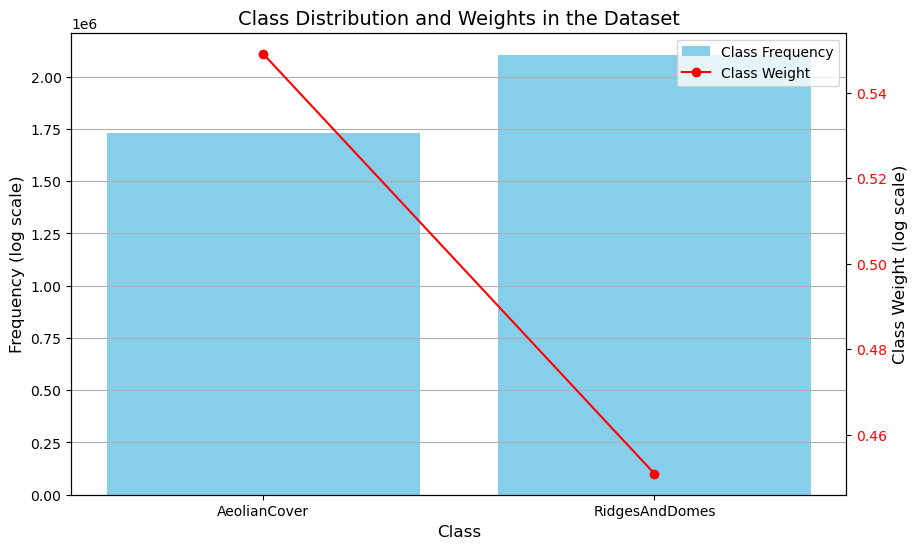

In [4]:
# Calculate class weights to handle class imbalance
class_weights = calculate_class_weights(masks, num_classes)

# Calculate the sum of all class weights
total_weight = sum(class_weights.values())

# Normalize the class weights
normalized_class_weights = {cls: weight / total_weight for cls, weight in class_weights.items()}

# Flatten the mask array to get a 1D array of class labels
flat_masks = masks.flatten()

# Calculate the frequency of each class
class_counts = np.bincount(flat_masks, minlength=num_classes)

# display class weights
# Plot a histogram showing the classes and their relative frequencies
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot class frequencies on the left y-axis with log scale
ax1.bar(range(num_classes), class_counts, color='skyblue', label='Class Frequency')
ax1.set_xlabel('Class', fontsize=12)
ax1.set_ylabel('Frequency (log scale)', fontsize=12)
ax1.set_title('Class Distribution and Weights in the Dataset', fontsize=14)
ax1.set_xticks(range(num_classes))
ax1.set_xticklabels(class_mapping.keys())
# ax1.set_yscale('log')
ax1.grid(axis='y')

# Create a second y-axis to plot class weights with log scale
ax2 = ax1.twinx()
ax2.plot(range(num_classes), normalized_class_weights.values(), color='red', marker='o', linestyle='-', label='Class Weight')
ax2.set_ylabel('Class Weight (log scale)', fontsize=12)
# ax2.set_yscale('log')
ax2.tick_params(axis='y', labelcolor='red')

# Add legends
fig.legend(loc='upper right', bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

# Show plot
plt.show()

### Split the data into train, validation and test dataset

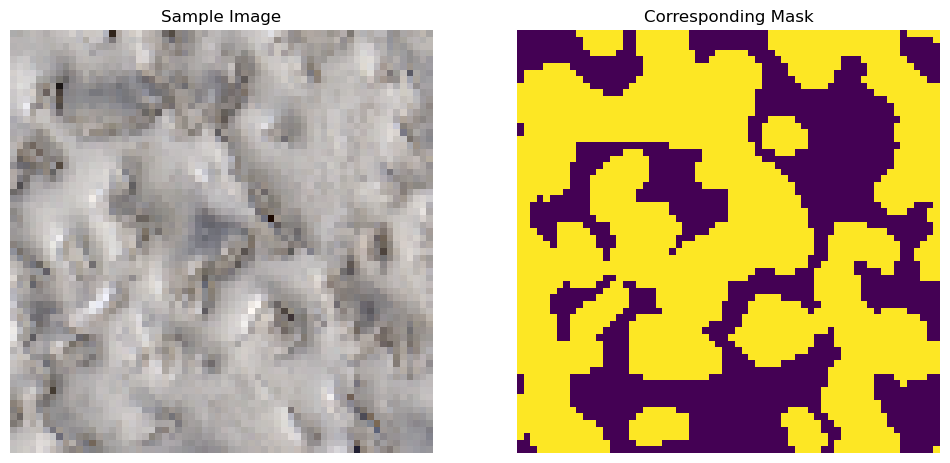

In [5]:
# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(images, masks, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Display a sample from the training set with custom color mapping
display_color_sample(X_train[0], y_train[0], class_mapping, color_mapping)

## Data preparation for training

### Functions

#### Function Parameters

- **BUFFER_SIZE**: This parameter sets the buffer size for shuffling the dataset. A larger buffer size ensures better shuffling.
- **AUTOTUNE**: This parameter is used to optimize the performance of the data pipeline by automatically tuning the number of parallel calls.

#### Function `process_mask`

**Purpose**: Converts a mask to one-hot encoding, which is useful for training segmentation models.

**Steps**:
1. `tf.squeeze(mask, axis=-1)`: Removes the single channel dimension if it exists.
2. `tf.one_hot(tf.cast(mask, tf.int32), num_classes)`: Converts the mask to one-hot encoding.
3. `tf.reshape(mask, (target_size[0], target_size[1], num_classes))`: Reshapes the mask to the desired shape.
4. `tf.cast(mask, tf.int32)`: Ensures the mask is of type `int32`.

#### Function `create_dataset`

**Purpose**: Creates a TensorFlow dataset from images and masks, with options for shuffling and data augmentation.

**Steps**:
1. `tf.data.Dataset.from_tensor_slices((images, masks))`: Creates a dataset from the images and masks.
2. `dataset.shuffle(buffer_size=BUFFER_SIZE)`: Shuffles the dataset if `shuffle` is `True`.

##### Nested Function `preprocess`

**Purpose**: Preprocesses an image and its corresponding mask.

**Steps**:
1. `tf.cast(image, tf.float32)`: Ensures the image is a floating point tf tensor.
2. `process_mask(mask, num_classes)`: One-hot encodes the mask.
3. `data_augmentation(image, mask)`: Applies data augmentation if `augment` is `True`.
4. `dataset.map(preprocess, num_parallel_calls=AUTOTUNE)`: Maps the `preprocess` function to the dataset.
5. `dataset.batch(batch_size)`: Batches the dataset.
6. `dataset.prefetch(buffer_size=AUTOTUNE)`: Prefetches the dataset to improve performance.

#### Function `data_augmentation`

**Purpose**: Applies data augmentation to an image and its corresponding mask.

**Steps**:
1. `tf.image.flip_left_right(image)`: Randomly flips the image and mask left to right.
2. `tf.image.flip_up_down(image)`: Randomly flips the image and mask up and down.
3. `tf.image.rot90(image, k=int(angle * 10))`: Randomly rotates the image and mask by up to ±20%.

#### Summary

- **Data Augmentation**: Techniques like flipping and rotating images help improve the generalization of the model by providing more diverse training examples.
- **One-Hot Encoding**: Converts categorical labels into a binary matrix representation, which is essential for training segmentation models.
- **TensorFlow Dataset API**: Provides efficient data loading and preprocessing, with options for shuffling, batching, and prefetching to optimize performance.

In [6]:
# Function parameters
BUFFER_SIZE = 1000  # Buffer size for shuffling
AUTOTUNE = tf.data.AUTOTUNE  # Optimize pipeline performance

# Function to convert masks to one-hot encoding if needed
def process_mask(mask, num_classes):
    """
    Convert a mask to one-hot encoding.

    Parameters:
    mask (tf.Tensor): The mask tensor.
    num_classes (int): The number of unique classes.

    Returns:
    tf.Tensor: One-hot encoded mask tensor.
    """
    mask = tf.squeeze(mask, axis=-1)  # Remove single channel if it exists
    mask = tf.one_hot(tf.cast(mask, tf.int32), num_classes)  # One-hot encode the mask
    mask = tf.reshape(mask, (target_size[0], target_size[1], num_classes))  # Reshape to (H, W, C)
    return tf.cast(mask, tf.int32)  # Ensure the mask is of type int32

# Function to create a TensorFlow dataset
def create_dataset(images, masks, batch_size, shuffle=False, augment=False):
    """
    Create a TensorFlow dataset from images and masks.

    Parameters:
    images (np.array): Array of images.
    masks (np.array): Array of masks.
    batch_size (int): The size of batches to create.
    shuffle (bool, optional): Whether to shuffle the dataset. Default is False.
    augment (bool, optional): Whether to apply data augmentation. Default is False.

    Returns:
    tf.data.Dataset: A TensorFlow dataset.
    """
    # Create a dataset from the images and masks
    dataset = tf.data.Dataset.from_tensor_slices((images, masks))
    
    if shuffle:
        dataset = dataset.shuffle(buffer_size=BUFFER_SIZE)  # Shuffle the dataset with a buffer size
    
    # Preprocessing function to normalize images and optionally augment
    def preprocess(image, mask):
        """
        Preprocess an image and its corresponding mask.

        Parameters:
        image (tf.Tensor): The image tensor.
        mask (tf.Tensor): The mask tensor.

        Returns:
        tuple: Preprocessed image and mask tensors.
        """
        image = tf.cast(image, tf.float32)
        # One-hot encode the mask
        mask = process_mask(mask, num_classes)
        
        if augment:
            image, mask = data_augmentation(image, mask)  # Apply data augmentation
        
        return image, mask
    
    # Map the preprocess function to the dataset
    dataset = dataset.map(preprocess, num_parallel_calls=AUTOTUNE)
    dataset = dataset.batch(batch_size)  # Batch the dataset
    dataset = dataset.prefetch(buffer_size=AUTOTUNE)  # Prefetch to improve performance
    
    return dataset

# Data Augmentation Function
def data_augmentation(image, mask):
    """
    Apply data augmentation to an image and its corresponding mask.

    Parameters:
    image (tf.Tensor): The image tensor.
    mask (tf.Tensor): The mask tensor.

    Returns:
    tuple: Augmented image and mask tensors.
    """
    # Randomly flip the image and mask left to right
    if tf.random.uniform(()) > 0.5:
        image = tf.image.flip_left_right(image)
        mask = tf.image.flip_left_right(mask)
    
    # Randomly flip the image and mask up and down
    if tf.random.uniform(()) > 0.5:
        image = tf.image.flip_up_down(image)
        mask = tf.image.flip_up_down(mask)
    
    # Randomly rotate the image and mask
    if tf.random.uniform(()) > 0.5:
        angle = tf.random.uniform((), minval=-0.2, maxval=0.2)  # Rotate up to ±20%
        image = tf.image.rot90(image, k=int(angle * 10))
        mask = tf.image.rot90(mask, k=int(angle * 10))
    
    return image, mask

### Prep

In [7]:
# Dataset Parameters
BATCH_SIZE = 16  # Set batch size

# Create datasets
train_dataset = create_dataset(X_train, y_train, BATCH_SIZE, shuffle=True, augment=True)
val_dataset = create_dataset(X_val, y_val, BATCH_SIZE)
test_dataset = create_dataset(X_test, y_test, BATCH_SIZE)

# Inspect the dataset (optional)
for images, masks in train_dataset.take(1):
    print(f"Image batch shape: {images.shape}")
    print(f"Mask batch shape: {masks.shape}")

Image batch shape: (16, 64, 64, 3)
Mask batch shape: (16, 64, 64, 2)


2025-03-26 08:54:21.185272: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


# Model building

## SegFormer Model

## SegFormer Architecture

SegFormer is a state-of-the-art architecture for semantic segmentation that combines the strengths of Transformers and CNNs. It is designed to be efficient and effective, providing high-quality segmentation results with fewer parameters compared to traditional CNN-based models.

<center>
    <img src="../files/segformer_architecture.jpg" alt="SegFormer architecture">
</center>

### SegFormer Architecture Details

1. **Hierarchical Transformer Encoder**: SegFormer uses a hierarchical Transformer encoder to capture multi-scale features. This encoder consists of multiple stages, each with a different resolution, allowing the model to capture both local and global context.
    - **Stage 1**: Processes the input image at the highest resolution, capturing fine-grained details.
    - **Stage 2**: Reduces the resolution and captures mid-level features.
    - **Stage 3**: Further reduces the resolution and captures high-level features.
    - **Stage 4**: Processes the image at the lowest resolution, capturing the most abstract features.

2. **MLP Decoder**: The decoder in SegFormer is a Multi-Layer Perceptron (MLP) that upsamples the features from the encoder to produce the final segmentation map. The MLP decoder is lightweight and efficient, making the model suitable for real-time applications.

3. **Efficient Attention Mechanism**: SegFormer employs an efficient attention mechanism that reduces the computational complexity of traditional self-attention, making it scalable to high-resolution images.

4. **Output Layer**: A final convolutional layer with a softmax activation to produce the segmentation map. This layer ensures that each pixel is assigned a class label.

### Advantages of SegFormer

- **Efficiency**: SegFormer is designed to be computationally efficient, making it suitable for deployment on edge devices and real-time applications.
- **Accuracy**: By combining the strengths of Transformers and CNNs, SegFormer achieves high accuracy on various semantic segmentation benchmarks.
- **Scalability**: The hierarchical Transformer encoder allows SegFormer to scale to high-resolution images without a significant increase in computational cost.

## Training a SegFormer Model

### Data Preparation

1. **Dataset**: Collect a dataset with images and corresponding pixel-wise annotations.
2. **Data Augmentation**: Apply transformations such as rotation, scaling, and flipping to increase the diversity of the training data.

### Model Training

1. **Initialize the Model**: Choose the SegFormer architecture and initialize the model.
2. **Compile the Model**: Specify the optimizer, loss function, and evaluation metrics.
3. **Train the Model**: Use the training data to fit the model, monitoring the validation performance to prevent overfitting.

### Evaluation

1. **Metrics**: Evaluate the model using metrics such as Intersection over Union (IoU) and pixel accuracy.
2. **Visualization**: Visualize the segmentation results to qualitatively assess the model's performance.

## References

1. [SegFormer: Rethinking Semantic Segmentation with Transformers](https://arxiv.org/abs/2105.15203)
2. [Transformers in Vision: A Survey](https://arxiv.org/abs/2101.01169)
3. [Attention is All You Need](https://arxiv.org/abs/1706.03762)

In [8]:
# Register the custom class with Keras
@register_keras_serializable()
class FBetaScoreWrapper(tf.keras.metrics.Metric):
    def __init__(self, num_classes, average='weighted', name='fbeta_score', **kwargs):
        super(FBetaScoreWrapper, self).__init__(name=name, **kwargs)
        self.num_classes = num_classes
        self.average = average
        self.fbeta_score = FBetaScore(average=average)

    def update_state(self, y_true, y_pred, sample_weight=None):
        # Flatten the predictions and targets
        y_true = tf.reshape(y_true, [-1, self.num_classes])
        y_pred = tf.reshape(y_pred, [-1, self.num_classes])
        self.fbeta_score.update_state(y_true, y_pred, sample_weight)

    def result(self):
        return self.fbeta_score.result()

    def reset_states(self):
        self.fbeta_score.reset_states()

    def get_config(self):
        config = super(FBetaScoreWrapper, self).get_config()
        config.update({
            'num_classes': self.num_classes,
            'average': self.average
        })
        return config

    @classmethod
    def from_config(cls, config):
        return cls(**config)

Model: "seg_former"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 64, 64, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ functional          │ [(None, 16, 16,   │  3,319,392 │ input_layer[0][0] │
│ (Functional)        │ 32), (None, 8, 8, │            │                   │
│                     │ 64), (None, 4, 4, │            │                   │
│                     │ 160), (None, 2,   │            │                   │
│                     │ 2, 256)]          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ linear_256 (Dense)  │ (None, 2, 2, 256) │     65,792 │ functional[0][3]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ linear_160 (Dense)  │ (None, 4, 4, 256) │     41,216 │ functional[0][2]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ linear_64 (Dense)   │ (None, 8, 8, 256) │     16,640 │ functional[0][1]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ linear_32 (Dense)   │ (None, 16, 16,    │      8,448 │ functional[0][0]  │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ resizing_3          │ (None, 16, 16,    │          0 │ linear_256[0][0]  │
│ (Resizing)          │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ resizing_2          │ (None, 16, 16,    │          0 │ linear_160[0][0]  │
│ (Resizing)          │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ resizing_1          │ (None, 16, 16,    │          0 │ linear_64[0][0]   │
│ (Resizing)          │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ resizing (Resizing) │ (None, 16, 16,    │          0 │ linear_32[0][0]   │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 16, 16,    │          0 │ resizing_3[0][0], │
│ (Concatenate)       │ 1024)             │            │ resizing_2[0][0], │
│                     │                   │            │ resizing_1[0][0], │
│                     │                   │            │ resizing[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential          │ (None, 16, 16,    │    263,168 │ concatenate[0][0] │
│ (Sequential)        │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 16, 16,    │          0 │ sequential[0][0]  │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_11 (Conv2D)  │ (None, 16, 16, 2) │        514 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ resizing_4          │ (None, 64, 64, 2) │          0 │ conv2d_11[0][0]   │
│ (Resizing)          │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 3,715,170 (14.17 MB)

 Trainable params: 3,714,658 (14.17 MB)

 Non-trainable params: 512 (2.00 KB)

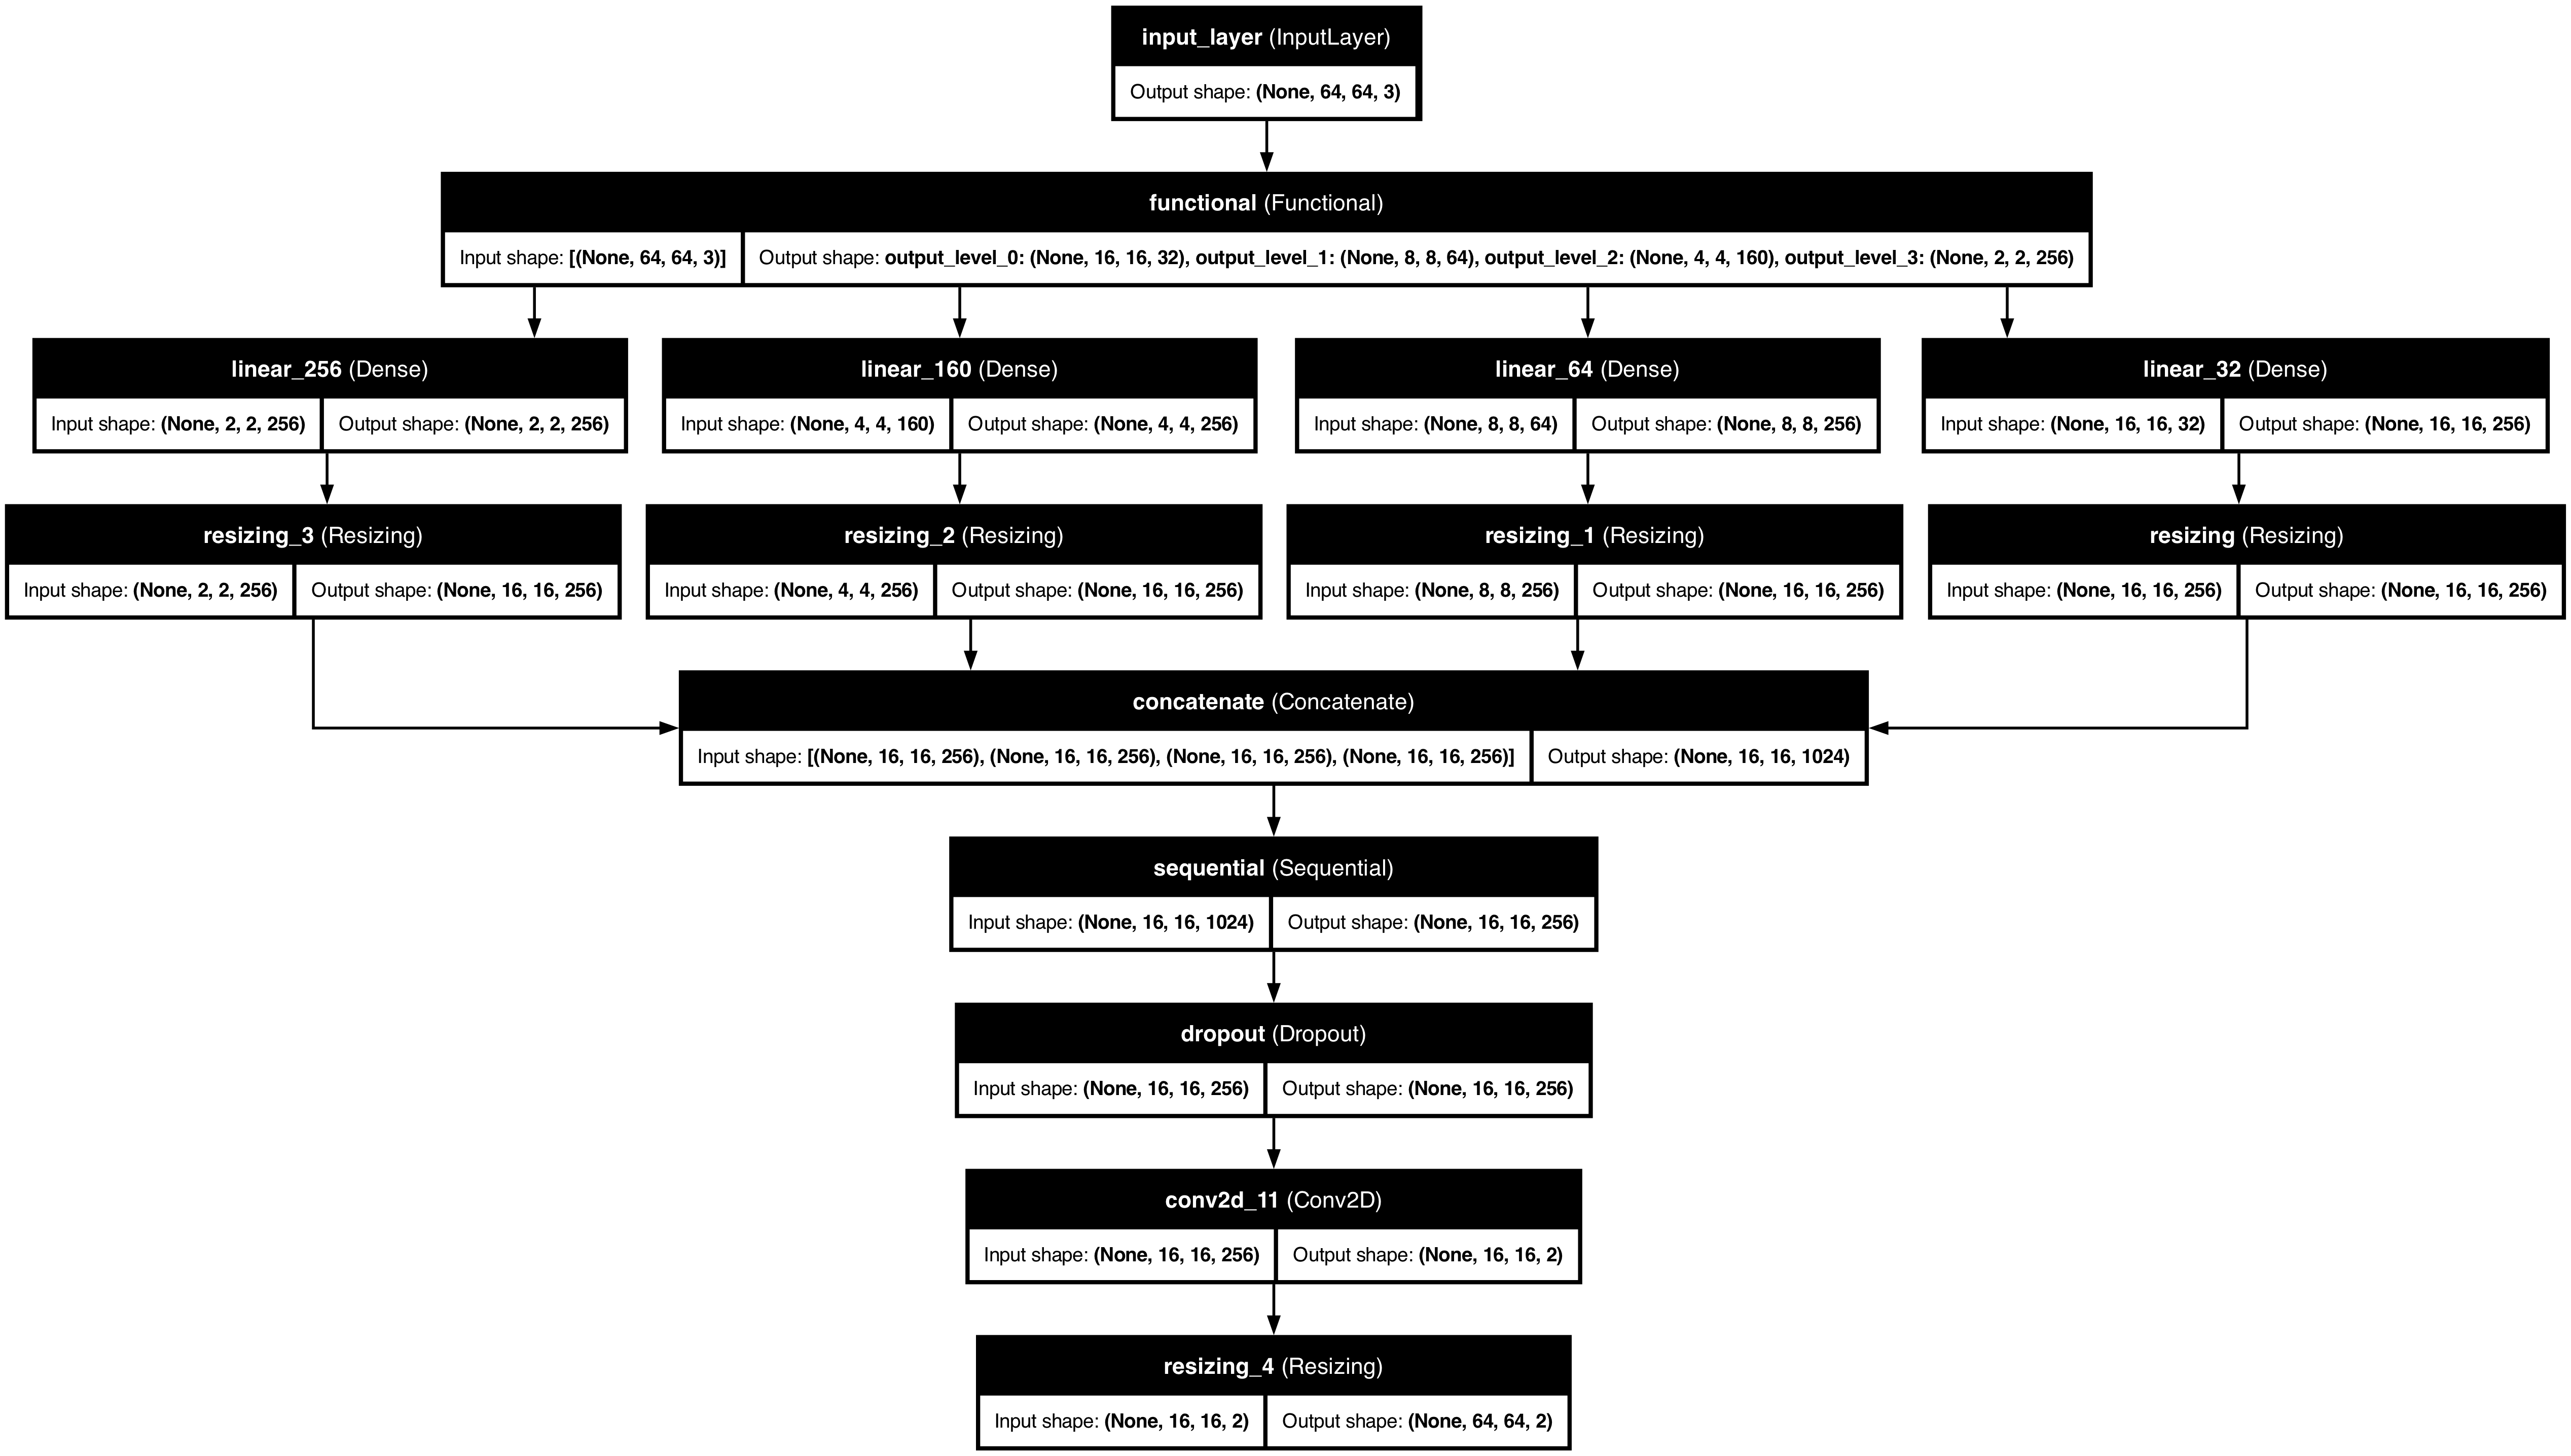

In [9]:

# Instantiate the custom metric
fbeta_score_metric = FBetaScoreWrapper(num_classes, average='weighted')

# Parameters
input_shape = (target_size[0], target_size[1], 3)  # Adjust based on image size

# weight options: [https://keras.io/api/keras_cv/models/tasks/segformer_segmentation/]
backbone = keras_cv.models.MiTBackbone.from_preset('mit_b0_imagenet', input_shape=input_shape)
# model = keras_cv.models.segmentation.SegFormer(num_classes=num_classes,
                                            #    backbone=backbone)
model = keras_cv.models.SegFormer(num_classes=num_classes,
                                  backbone=backbone)

# Freeze layers
N = 1
for layer in model.layers[:N]: 
    layer.trainable = False
    
# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.005),
    loss=CategoricalCrossentropy(from_logits=False),
    metrics=['accuracy', 
             MeanIoU(num_classes=num_classes, sparse_y_true=False, sparse_y_pred=False, name='mean_iou'),
             fbeta_score_metric]
)

# Display the model architecture
model.summary()

# Visualize the model architecture
plot_model(model, to_file='segformer_architecture.png', show_shapes=True, show_layer_names=True)


## Training

#### Good segformer parameters:  
- Freeze = 1  
- lr = 0.005  
- lr_reduce = (monitor='val_loss', factor=0.2, patience=10, min_lr=1e-6)  

Epoch 1/100


/Users/phillipsm/anaconda3/envs/cnn/lib/python3.12/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor']. Received: the structure of inputs=*
  warnings.warn(


41/41 ━━━━━━━━━━━━━━━━━━━━ 18s 143ms/step - accuracy: 0.5017 - fbeta_score: 0.5016 - loss: 1.0559 - mean_iou: 0.3327 - val_accuracy: 0.4586 - val_fbeta_score: 0.2884 - val_loss: 1.6215 - val_mean_iou: 0.2293 - learning_rate: 0.0050
Epoch 2/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 122ms/step - accuracy: 0.4888 - fbeta_score: 0.4732 - loss: 0.7186 - mean_iou: 0.3172 - val_accuracy: 0.5414 - val_fbeta_score: 0.3803 - val_loss: 0.7192 - val_mean_iou: 0.2707 - learning_rate: 0.0050
Epoch 3/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - accuracy: 0.5165 - fbeta_score: 0.5107 - loss: 0.7139 - mean_iou: 0.3400 - val_accuracy: 0.5414 - val_fbeta_score: 0.3803 - val_loss: 0.6896 - val_mean_iou: 0.2707 - learning_rate: 0.0050
Epoch 4/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 134ms/step - accuracy: 0.5046 - fbeta_score: 0.5008 - loss: 0.7070 - mean_iou: 0.3315 - val_accuracy: 0.4586 - val_fbeta_score: 0.2884 - val_loss: 0.7407 - val_mean_iou: 0.2293 - learning_rate: 0.0050
Epoch 5/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 

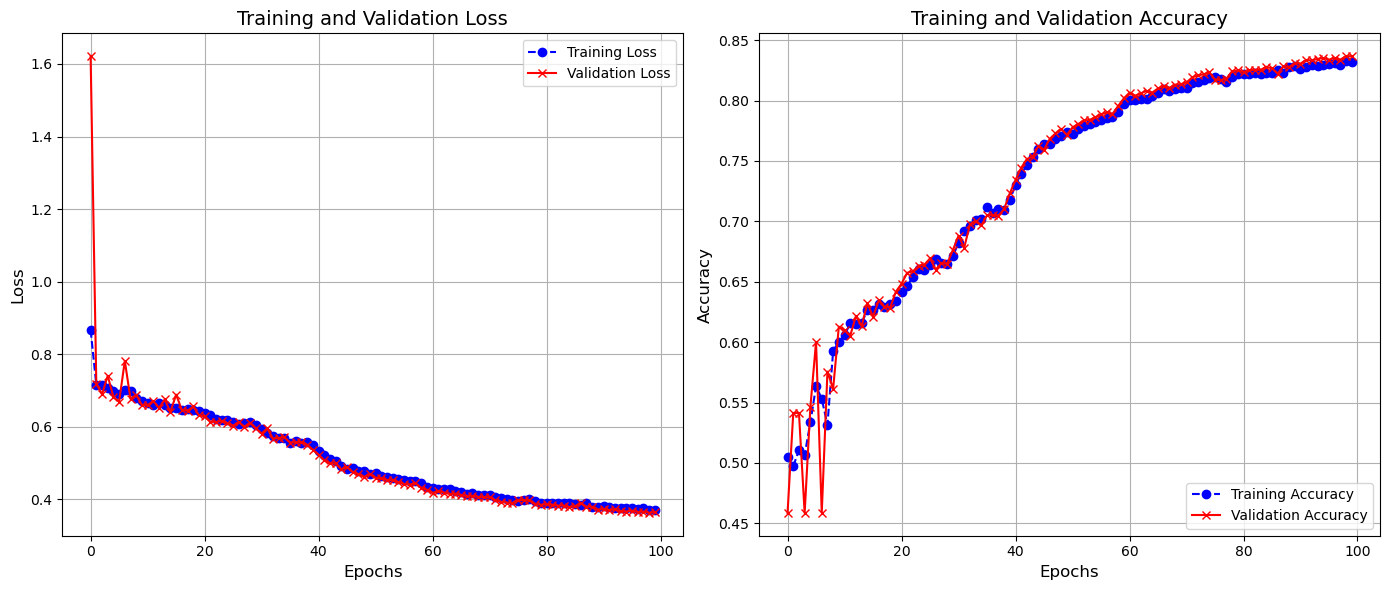

In [10]:
# Training parameters
epochs = 100 # Number of epochs to train the model
batch_size = BATCH_SIZE  # Batch size is already defined

# Callbacks
checkpoint_cb = ModelCheckpoint(f'models/segformer_{epochs}.keras', save_best_only=True, monitor='val_loss', mode='min')
early_stopping_cb = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)
reduce_lr_cb = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=10, min_lr=1e-6)

# Train the model
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=epochs,
    callbacks=[checkpoint_cb, early_stopping_cb, reduce_lr_cb],
    class_weight=class_weights
)

# Plot training history with separate subplots for loss and accuracy
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot loss
ax1.plot(history.history['loss'], label='Training Loss', color='blue', linestyle='--', marker='o')
ax1.plot(history.history['val_loss'], label='Validation Loss', color='red', linestyle='-', marker='x')
ax1.set_title('Training and Validation Loss', fontsize=14)
ax1.set_xlabel('Epochs', fontsize=12)
ax1.set_ylabel('Loss', fontsize=12)
ax1.legend(loc='upper right')
ax1.grid(True)

# Plot accuracy
ax2.plot(history.history['accuracy'], label='Training Accuracy', color='blue', linestyle='--', marker='o')
ax2.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red', linestyle='-', marker='x')
ax2.set_title('Training and Validation Accuracy', fontsize=14)
ax2.set_xlabel('Epochs', fontsize=12)
ax2.set_ylabel('Accuracy', fontsize=12)
ax2.legend(loc='lower right')
ax2.grid(True)

# Adjust layout and show plot
plt.tight_layout()
plt.show()

## Continue training on a saved model

Epoch 1/30


/Users/phillipsm/anaconda3/envs/cnn/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 392 variables whereas the saved optimizer has 16 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
/Users/phillipsm/anaconda3/envs/cnn/lib/python3.12/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_1112']. Received: the structure of inputs=*
  warnings.warn(


41/41 ━━━━━━━━━━━━━━━━━━━━ 193s 5s/step - accuracy: 0.4544 - fbeta_score: 0.4532 - loss: 1.2796 - mean_iou: 0.2638 - val_accuracy: 0.5103 - val_fbeta_score: 0.4500 - val_loss: 1.6638 - val_mean_iou: 0.2024 - learning_rate: 1.0000e-05
Epoch 2/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 186s 5s/step - accuracy: 0.4951 - fbeta_score: 0.5172 - loss: 1.1895 - mean_iou: 0.2937 - val_accuracy: 0.4999 - val_fbeta_score: 0.4528 - val_loss: 1.4357 - val_mean_iou: 0.2154 - learning_rate: 1.0000e-05
Epoch 3/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 188s 5s/step - accuracy: 0.5125 - fbeta_score: 0.5299 - loss: 1.1673 - mean_iou: 0.3112 - val_accuracy: 0.4533 - val_fbeta_score: 0.4483 - val_loss: 1.1879 - val_mean_iou: 0.2298 - learning_rate: 1.0000e-05
Epoch 4/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 188s 5s/step - accuracy: 0.5136 - fbeta_score: 0.5315 - loss: 1.1520 - mean_iou: 0.3123 - val_accuracy: 0.5108 - val_fbeta_score: 0.4968 - val_loss: 1.1076 - val_mean_iou: 0.2805 - learning_rate: 1.0000e-05
Epoch 5/30
41/41 ━━━━━━━━━━━━━━

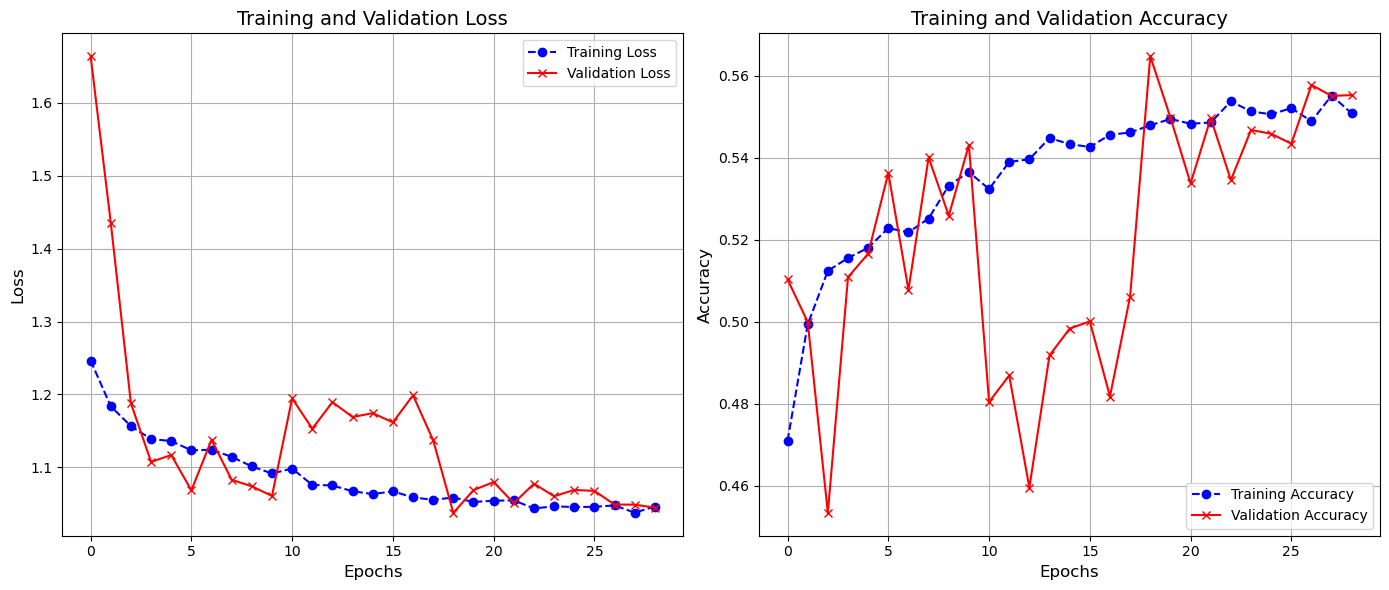

In [29]:
epochs = 30 # Number of epochs to train the model

# Load the saved model with custom objects
model = load_model('models/best_model_20.keras', custom_objects={'FBetaScoreWrapper': FBetaScoreWrapper})

# Freeze the top layers of the base model
N = 4
for layer in model.layers[:N]: 
    layer.trainable = False

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.00001),
    loss=CategoricalCrossentropy(from_logits=False),
    metrics=['accuracy', 
             MeanIoU(num_classes=num_classes, sparse_y_true=False, sparse_y_pred=False, name='mean_iou'),
             fbeta_score_metric]
)

# Callbacks
checkpoint_cb = ModelCheckpoint('models/deep_lab_f4_50.keras', save_best_only=True, monitor='val_loss', mode='min')
early_stopping_cb = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr_cb = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)

# Train the model
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=epochs,
    callbacks=[checkpoint_cb, early_stopping_cb, reduce_lr_cb],
    class_weight=class_weights
)

# Plot training history with separate subplots for loss and accuracy
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot loss
ax1.plot(history.history['loss'], label='Training Loss', color='blue', linestyle='--', marker='o')
ax1.plot(history.history['val_loss'], label='Validation Loss', color='red', linestyle='-', marker='x')
ax1.set_title('Training and Validation Loss', fontsize=14)
ax1.set_xlabel('Epochs', fontsize=12)
ax1.set_ylabel('Loss', fontsize=12)
ax1.legend(loc='upper right')
ax1.grid(True)

# Plot accuracy
ax2.plot(history.history['accuracy'], label='Training Accuracy', color='blue', linestyle='--', marker='o')
ax2.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red', linestyle='-', marker='x')
ax2.set_title('Training and Validation Accuracy', fontsize=14)
ax2.set_xlabel('Epochs', fontsize=12)
ax2.set_ylabel('Accuracy', fontsize=12)
ax2.legend(loc='lower right')
ax2.grid(True)

# Adjust layout and show plot
plt.tight_layout()
plt.show()

## Monitor training experiments with weights and biases

Epoch 1/50


/Users/phillipsm/anaconda3/envs/cnn/lib/python3.12/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_126']. Received: the structure of inputs=*
  warnings.warn(


41/41 ━━━━━━━━━━━━━━━━━━━━ 20s 162ms/step - accuracy: 0.4979 - fbeta_score: 0.4951 - loss: 1.0768 - mean_iou: 0.3280 - val_accuracy: 0.5414 - val_fbeta_score: 0.3803 - val_loss: 1.4145 - val_mean_iou: 0.2707 - learning_rate: 0.0100
Epoch 2/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 151ms/step - accuracy: 0.5045 - fbeta_score: 0.5042 - loss: 0.7022 - mean_iou: 0.3345 - val_accuracy: 0.5414 - val_fbeta_score: 0.3803 - val_loss: 0.8239 - val_mean_iou: 0.2707 - learning_rate: 0.0100
Epoch 3/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 8s 180ms/step - accuracy: 0.4887 - fbeta_score: 0.4833 - loss: 0.7182 - mean_iou: 0.3209 - val_accuracy: 0.5414 - val_fbeta_score: 0.3803 - val_loss: 0.8203 - val_mean_iou: 0.2707 - learning_rate: 0.0100
Epoch 4/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 146ms/step - accuracy: 0.5220 - fbeta_score: 0.5075 - loss: 0.7087 - mean_iou: 0.3368 - val_accuracy: 0.5414 - val_fbeta_score: 0.3803 - val_loss: 0.7457 - val_mean_iou: 0.2707 - learning_rate: 0.0100
Epoch 5/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 1

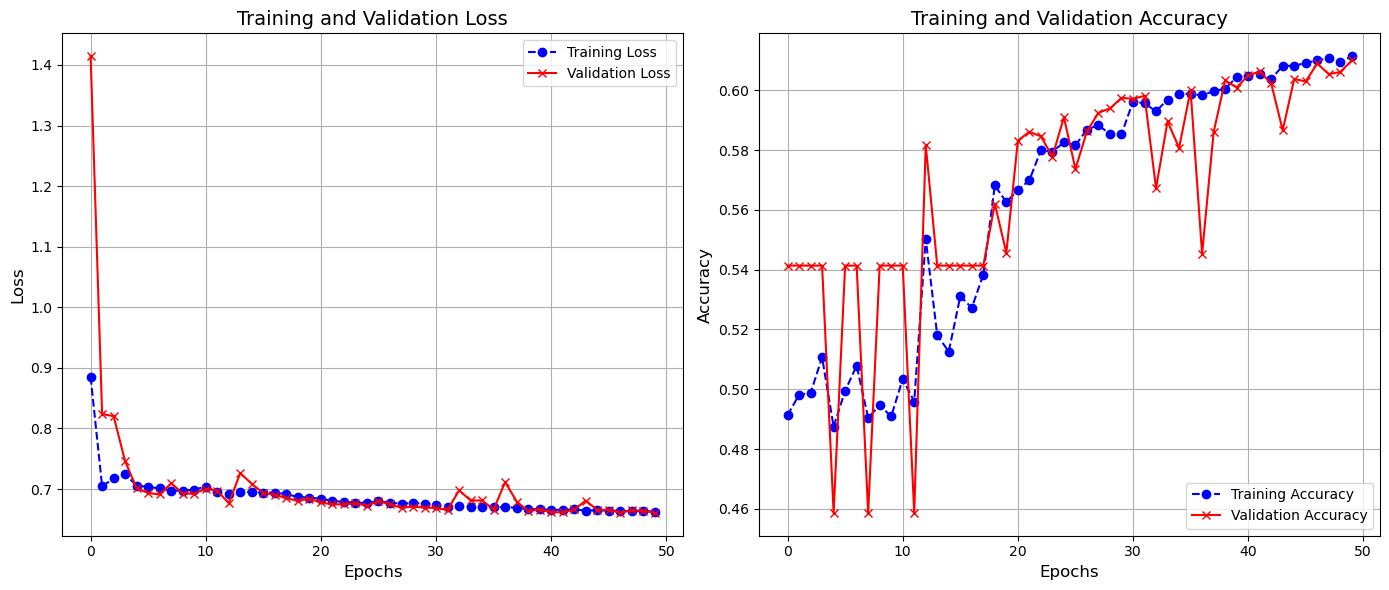

accuracy,▁▂▂▂▁▂▁▁▁▂▅▃▂▃▃▆▅▅▆▆▆▇▇▇▇▇▇▇▇▇▇▇████████
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
fbeta_score,▂▂▂▃▁▃▂▂▂▂▃▃▁▃▄▆▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇████████
learning_rate,██████████▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
loss,█▂▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
mean_iou,▁▂▂▂▁▂▁▂▁▂▄▂▂▁▃▅▅▅▆▆▆▆▆▆▆▇▇▇▇▇▇▇████████
val_accuracy,▅▅▅▅▁▅▁▅▅▅▇▅▅▅▅▅▇▇▇▇▆▇▇▇▇▇▇▇█▅██████████
val_fbeta_score,▃▃▃▃▁▃▁▃▃▃▇▃▃▃▃▃▆▆▆▆▇█▇██▇▇█▇▇██████████
val_loss,█▅▃▂▂▂▂▃▃▂▃▂▂▂▂▂▂▂▂▂▂▁▁▁▁▃▂▂▁▃▁▁▁▁▁▁▁▁▁▁
val_mean_iou,▂▂▂▂▁▂▁▂▂▂▆▂▂▂▂▄▃▅▆▆▇▇▇▇▇▇▇▇█▇▆▇███▇████
accuracy,0.61141


Epoch 1/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 144ms/step - accuracy: 0.4969 - fbeta_score: 0.4922 - loss: 1.4221 - mean_iou: 0.3277 - val_accuracy: 0.4586 - val_fbeta_score: 0.2884 - val_loss: 2.7099 - val_mean_iou: 0.2293 - learning_rate: 0.0050
Epoch 2/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 139ms/step - accuracy: 0.5222 - fbeta_score: 0.4777 - loss: 0.7315 - mean_iou: 0.3178 - val_accuracy: 0.4586 - val_fbeta_score: 0.2884 - val_loss: 0.7132 - val_mean_iou: 0.2293 - learning_rate: 0.0050
Epoch 3/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 148ms/step - accuracy: 0.4842 - fbeta_score: 0.4643 - loss: 0.7067 - mean_iou: 0.3120 - val_accuracy: 0.5414 - val_fbeta_score: 0.3803 - val_loss: 0.6905 - val_mean_iou: 0.2707 - learning_rate: 0.0050
Epoch 4/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 139ms/step - accuracy: 0.5123 - fbeta_score: 0.5016 - loss: 0.6960 - mean_iou: 0.3330 - val_accuracy: 0.4586 - val_fbeta_score: 0.2884 - val_loss: 0.7184 - val_mean_iou: 0.2293 - learning_rate: 0.0050
Epoch 5/50
41/41 ━━━━━━━━━━━━━━━

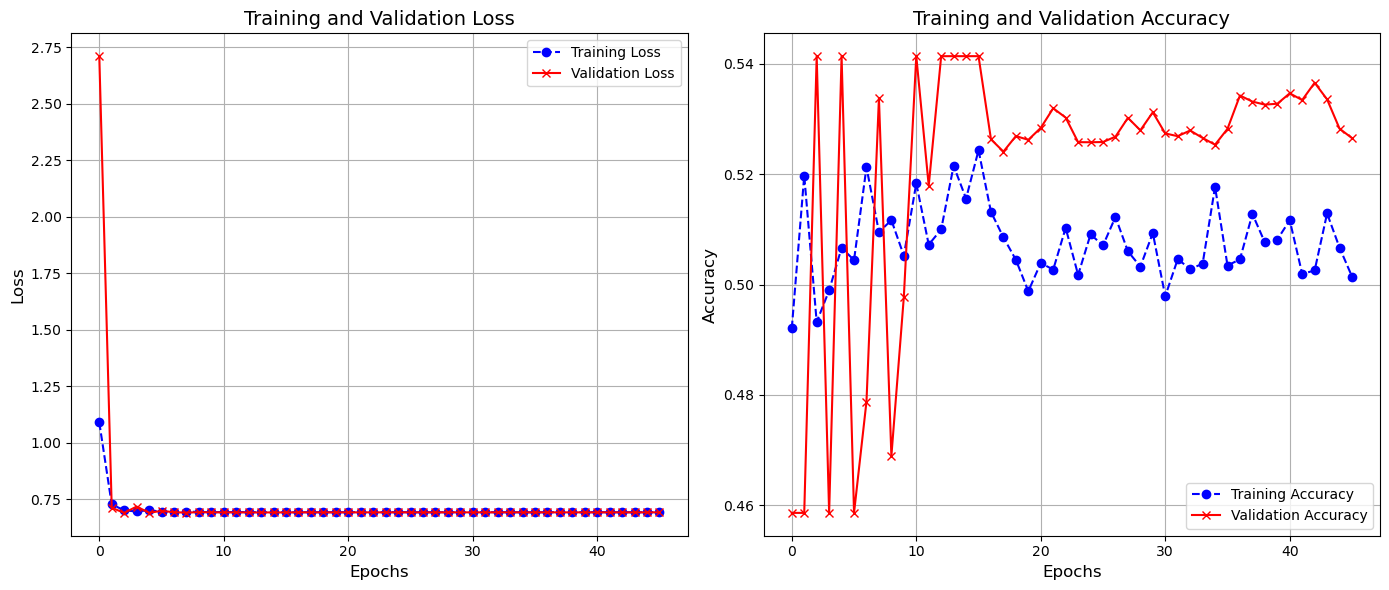

accuracy,▁█▁▃▄▄█▆▄▇▅▅█▇▆▅▄▃▄▄▃▅▅▆▄▄▅▄▄▄▇▄▄▅▅▆▃▃▆▄
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇████
fbeta_score,▂▁▃▅▆▆█▆▆▅▅▅▄▆▇▆▆▅▅▅▅▆▆▆▆▆▆▆▅▅█▆▆▆▆▆▅▅▇▆
learning_rate,███████▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
loss,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
mean_iou,▃▁▃▅▅▆█▅▆▅▄▅▃▆▆▆▆▄▄▅▄▅▅▆▆▅▆▅▅▅█▆▅▅▅▆▅▅▇▆
val_accuracy,▁▁█▁█▁▃▂▄█▆███▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇█▇▇
val_fbeta_score,▁▁▄▁▄▁▆▄█▄█▄▄▄▇▇▇▇▇▆▇▇▇▇▇▇▆▇▇▇▇▇▆▆▆▆▆▅▆▇
val_loss,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_mean_iou,▁▁▄▁▄▁▆▄█▄█▄▄▄▇▇▇▇▇▆▇▇▇▇▆▇▆▇▇▇▇▇▆▆▆▅▆▅▆▇
accuracy,0.50145


Epoch 1/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 153ms/step - accuracy: 0.5004 - fbeta_score: 0.4991 - loss: 0.9203 - mean_iou: 0.3304 - val_accuracy: 0.4586 - val_fbeta_score: 0.2884 - val_loss: 0.7013 - val_mean_iou: 0.2293 - learning_rate: 0.0010
Epoch 2/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 157ms/step - accuracy: 0.4797 - fbeta_score: 0.4646 - loss: 0.7088 - mean_iou: 0.3108 - val_accuracy: 0.5414 - val_fbeta_score: 0.3803 - val_loss: 0.6897 - val_mean_iou: 0.2707 - learning_rate: 0.0010
Epoch 3/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 151ms/step - accuracy: 0.5121 - fbeta_score: 0.4994 - loss: 0.7051 - mean_iou: 0.3317 - val_accuracy: 0.5414 - val_fbeta_score: 0.3803 - val_loss: 0.7087 - val_mean_iou: 0.2707 - learning_rate: 0.0010
Epoch 4/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 142ms/step - accuracy: 0.5006 - fbeta_score: 0.4981 - loss: 0.7026 - mean_iou: 0.3320 - val_accuracy: 0.4776 - val_fbeta_score: 0.4390 - val_loss: 0.6935 - val_mean_iou: 0.2982 - learning_rate: 0.0010
Epoch 5/50
41/41 ━━━━━━━━━━━━━━━

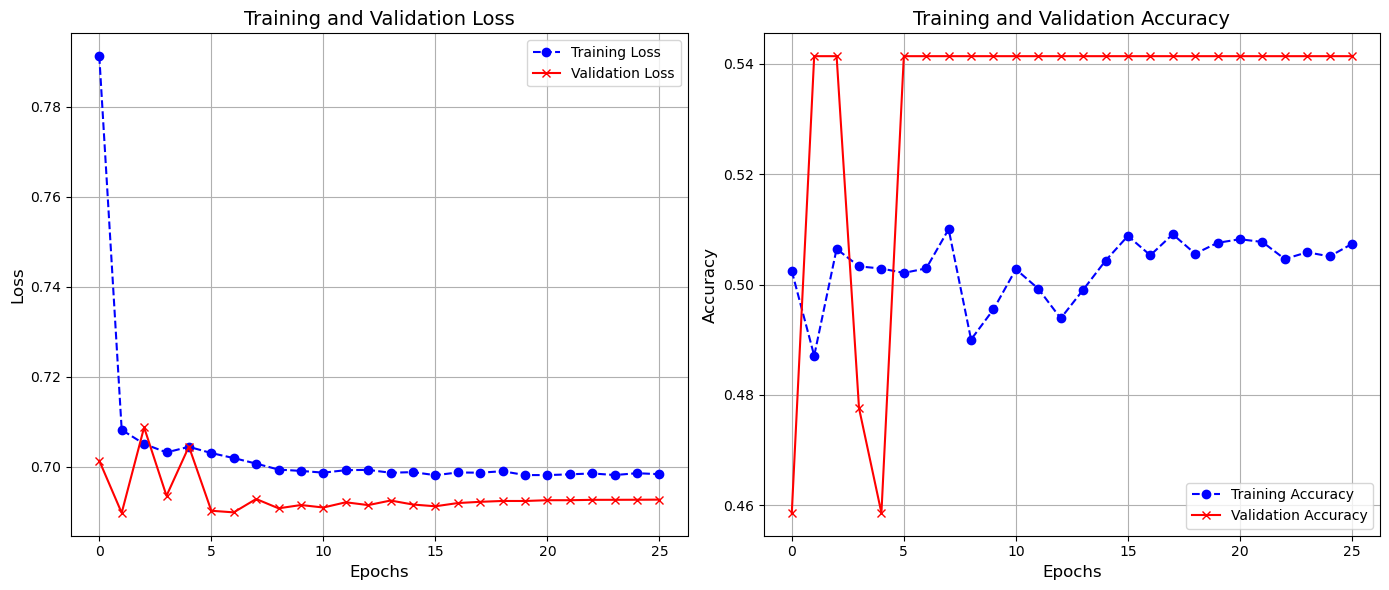

accuracy,▆▁▇▆▆▆▆█▂▄▆▅▃▅▆█▇█▇▇▇▇▆▇▆▇
epoch,▁▁▂▂▂▂▃▃▃▄▄▄▄▅▅▅▅▆▆▆▇▇▇▇██
fbeta_score,▇▁▇▇▇▇▇█▂▅▇▆▄▆▇█▇█▇███▇▇▇█
learning_rate,███████▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
loss,█▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
mean_iou,▇▁▇▇▇▇▇█▂▅▇▆▄▆▇█▇█▇▇██▇▇▇█
val_accuracy,▁██▃▁█████████████████████
val_fbeta_score,▁▅▅█▁▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅
val_loss,▅▁█▂▆▁▁▂▁▂▁▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂
val_mean_iou,▁▅▅█▁▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅
accuracy,0.50736


Epoch 1/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 146ms/step - accuracy: 0.5034 - fbeta_score: 0.4978 - loss: 1.2253 - mean_iou: 0.3302 - val_accuracy: 0.5414 - val_fbeta_score: 0.3803 - val_loss: 2.9567 - val_mean_iou: 0.2707 - learning_rate: 0.0100
Epoch 2/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 145ms/step - accuracy: 0.4884 - fbeta_score: 0.4791 - loss: 0.7700 - mean_iou: 0.3189 - val_accuracy: 0.5414 - val_fbeta_score: 0.3803 - val_loss: 1.1536 - val_mean_iou: 0.2707 - learning_rate: 0.0100
Epoch 3/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 145ms/step - accuracy: 0.5249 - fbeta_score: 0.5103 - loss: 0.7496 - mean_iou: 0.3407 - val_accuracy: 0.5414 - val_fbeta_score: 0.3803 - val_loss: 0.7166 - val_mean_iou: 0.2707 - learning_rate: 0.0100
Epoch 4/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 138ms/step - accuracy: 0.4824 - fbeta_score: 0.4602 - loss: 0.7091 - mean_iou: 0.3100 - val_accuracy: 0.5414 - val_fbeta_score: 0.3803 - val_loss: 0.7258 - val_mean_iou: 0.2707 - learning_rate: 0.0100
Epoch 5/50
41/41 ━━━━━━━━━━━━━━━

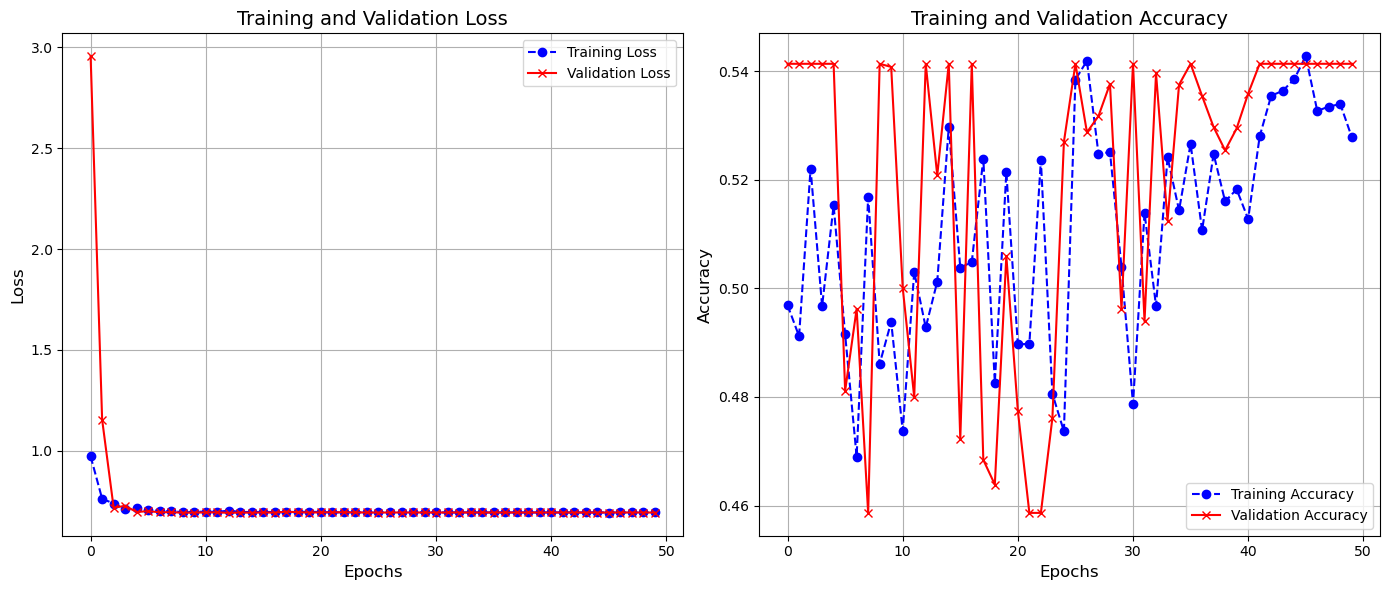

accuracy,▄▃▆▄▅▁▆▃▃▁▃▄▇▄▄▂▆▃▆▂██▆▆▄▅▄▆▅▆▅▆▅▇▇██▇▇▇
epoch,▁▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
fbeta_score,▆▅█▆▇▆▄▆▂▇▇▅▆▇▂▅▅▇▃▁▄▆▅▇▂▆▆▇▅▆▇▇▇▅▂▂▄▄▄▄
learning_rate,███████████████████▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
loss,█▃▂▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
mean_iou,▆▆█▆▇▁▇▅▆▃▆▆▆▇▆▆▆▆▇▄▅▆▆▇▄▆▇▇▆▆▇▇▇▆▄▄▅▅▅▅
val_accuracy,█████▄██▅▃▆█▂█▂▅▃▁▁▂█▇▇█▄▄█▆██▇▇████████
val_fbeta_score,▄▄▄▄▄█▁▄▄█▄█▄▅▄▃█▆▁▁▄▇▆▅█▄█▅▄▅▇▆▅▄▄▄▄▄▄▄
val_loss,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_mean_iou,▄▄▄▄▄█▁▄▄▆█▄▄▄▄▇▆▁▁▅▄▆▅█▄▄█▄▄▅▆▆▄▄▄▄▄▄▄▄
accuracy,0.52784


Epoch 1/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 142ms/step - accuracy: 0.5070 - fbeta_score: 0.5033 - loss: 1.0566 - mean_iou: 0.3351 - val_accuracy: 0.4586 - val_fbeta_score: 0.2884 - val_loss: 0.8890 - val_mean_iou: 0.2293 - learning_rate: 0.0050
Epoch 2/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 140ms/step - accuracy: 0.5104 - fbeta_score: 0.5064 - loss: 0.7170 - mean_iou: 0.3372 - val_accuracy: 0.5414 - val_fbeta_score: 0.3803 - val_loss: 0.7043 - val_mean_iou: 0.2707 - learning_rate: 0.0050
Epoch 3/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 136ms/step - accuracy: 0.5218 - fbeta_score: 0.5180 - loss: 0.7049 - mean_iou: 0.3454 - val_accuracy: 0.5414 - val_fbeta_score: 0.3803 - val_loss: 0.7673 - val_mean_iou: 0.2707 - learning_rate: 0.0050
Epoch 4/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 136ms/step - accuracy: 0.5038 - fbeta_score: 0.4989 - loss: 0.7006 - mean_iou: 0.3304 - val_accuracy: 0.4586 - val_fbeta_score: 0.2884 - val_loss: 0.7191 - val_mean_iou: 0.2293 - learning_rate: 0.0050
Epoch 5/50
41/41 ━━━━━━━━━━━━━━━

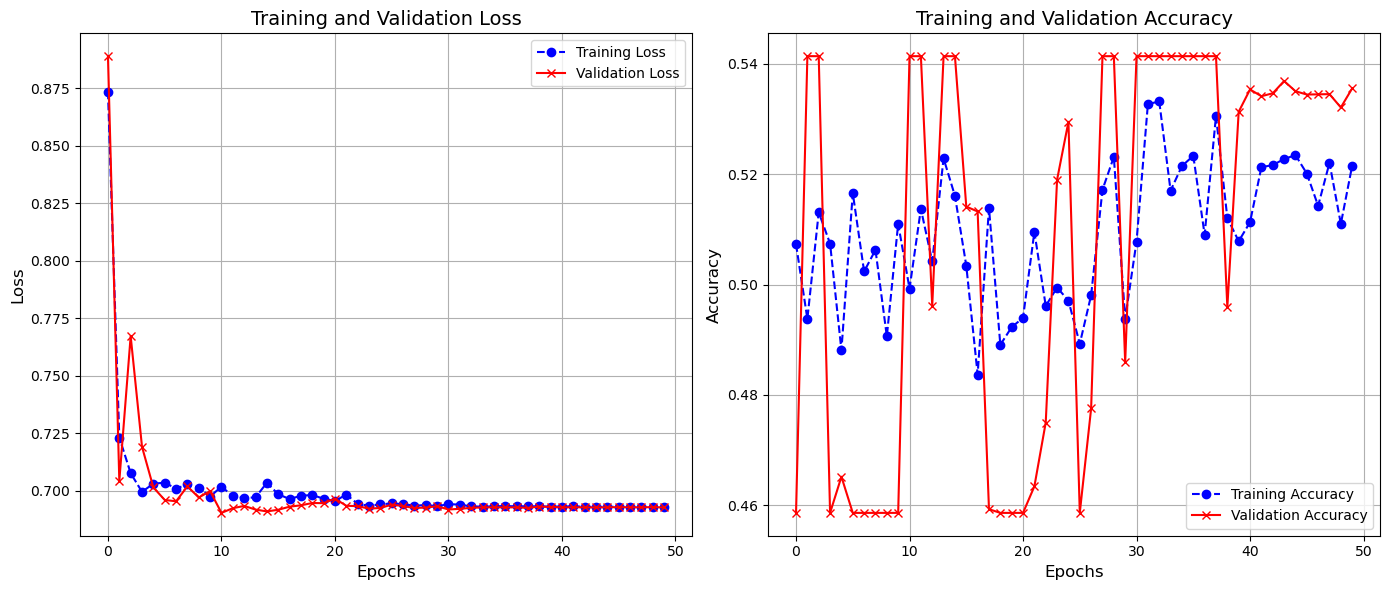

accuracy,▄▂▅▄▂▄▄▂▅▅▇▆▄▁▅▂▂▅▃▃▂▃▆▇▂██▆▆▇█▅▄▆▆▇▆▅▆▆
epoch,▁▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇██
fbeta_score,▇▅█▇▄▇▇▅▇▆▇█▆▃█▅▅▇▆▆▅▆▇▄▅▁▇▄▄▇▇▇▇▆▆▇▆▇▆▇
learning_rate,████████████████▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
loss,█▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
mean_iou,▇▅█▇▄▆▇▄▇▆▆█▅▆▃▅▅▇▅▆▄▅▆▃▅▁▃▇▄▄▃▆▇▆▅▆▆▇▆▆
val_accuracy,▁██▁▂▁▁▁▁█▄██▆▆▁▁▁▂▆▁▃██▃██████▄▇▇▇█▇▇▇▇
val_fbeta_score,▁▄▄▁▁▁▁▁▄▄▄▄██▁▁▁▂▅█▁▆▄▇▄▄▄▄▄▄█▆▅▆▆▆▆▆▆▅
val_loss,█▁▄▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_mean_iou,▁▄▄▁▃▁▁▁▁▄█▄▄██▁▁▁▂▅▆▁▆▄▄▄▄▄▄▄▄█▆▅▅▅▅▅▅▅
accuracy,0.52155


Epoch 1/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 140ms/step - accuracy: 0.4956 - fbeta_score: 0.4929 - loss: 0.9212 - mean_iou: 0.3265 - val_accuracy: 0.4586 - val_fbeta_score: 0.2884 - val_loss: 0.8723 - val_mean_iou: 0.2293 - learning_rate: 0.0010
Epoch 2/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 142ms/step - accuracy: 0.5076 - fbeta_score: 0.5068 - loss: 0.7038 - mean_iou: 0.3380 - val_accuracy: 0.4586 - val_fbeta_score: 0.2884 - val_loss: 0.7232 - val_mean_iou: 0.2293 - learning_rate: 0.0010
Epoch 3/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 139ms/step - accuracy: 0.4854 - fbeta_score: 0.4825 - loss: 0.7037 - mean_iou: 0.3184 - val_accuracy: 0.5414 - val_fbeta_score: 0.3803 - val_loss: 0.6900 - val_mean_iou: 0.2707 - learning_rate: 0.0010
Epoch 4/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 135ms/step - accuracy: 0.4942 - fbeta_score: 0.4886 - loss: 0.7026 - mean_iou: 0.3252 - val_accuracy: 0.5414 - val_fbeta_score: 0.3803 - val_loss: 0.6908 - val_mean_iou: 0.2707 - learning_rate: 0.0010
Epoch 5/50
41/41 ━━━━━━━━━━━━━━━

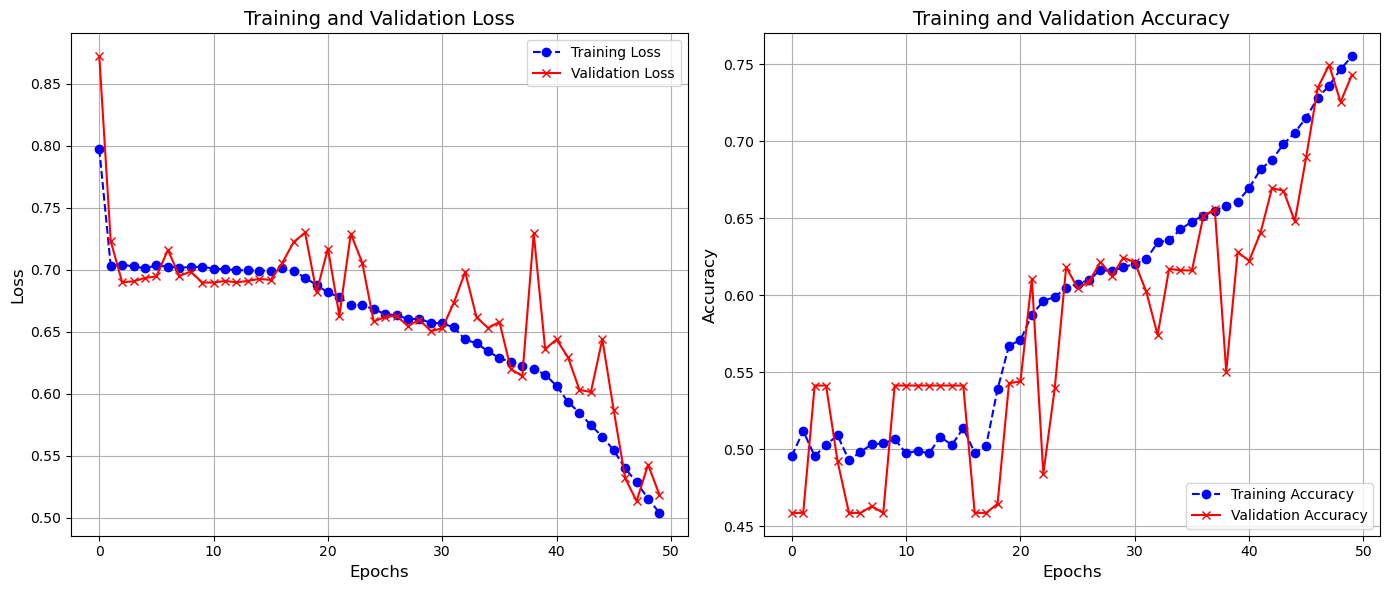

accuracy,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▂▃▃▃▄▄▄▄▄▄▄▅▅▅▅▅▅▅▆▆▆▇▇▇█
epoch,▁▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇▇███
fbeta_score,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▃▃▃▄▄▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▇▇▇▇█
learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
loss,█▆▆▆▆▆▆▆▆▆▆▆▆▆▆▅▅▅▅▅▅▅▅▅▅▄▄▄▄▄▄▄▃▃▃▂▂▂▂▁
mean_iou,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▃▃▃▃▃▄▄▄▄▄▄▄▄▅▅▅▅▅▆▆▆▇▇▇█
val_accuracy,▁▁▃▃▂▁▁▁▃▃▃▃▃▃▁▁▃▃▅▂▅▅▅▅▅▄▅▅▅▆▃▅▅▅▆▆▇███
val_fbeta_score,▁▁▂▂▄▁▂▁▂▂▂▂▂▂▁▁▂▃▆▂▆▅▆▆▅▆▆▅▆▆▆▇▄▆▆▆▇███
val_loss,█▅▄▄▅▅▅▅▄▄▄▄▄▄▅▅▄▅▄▅▄▄▄▄▄▄▅▄▄▃▅▃▄▃▃▄▂▁▁▁
val_mean_iou,▁▁▂▂▃▁▁▁▂▂▂▂▂▂▁▂▅▂▃▅▅▅▄▅▅▄▅▅▅▆▃▅▅▆▆▆▇███
accuracy,0.75526


Epoch 1/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 140ms/step - accuracy: 0.5004 - fbeta_score: 0.4982 - loss: 1.2271 - mean_iou: 0.3312 - val_accuracy: 0.5414 - val_fbeta_score: 0.3803 - val_loss: 4.8812 - val_mean_iou: 0.2707 - learning_rate: 0.0100
Epoch 2/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 139ms/step - accuracy: 0.4967 - fbeta_score: 0.4953 - loss: 0.7461 - mean_iou: 0.3274 - val_accuracy: 0.5414 - val_fbeta_score: 0.3803 - val_loss: 2.7411 - val_mean_iou: 0.2707 - learning_rate: 0.0100
Epoch 3/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 140ms/step - accuracy: 0.5068 - fbeta_score: 0.5007 - loss: 0.7075 - mean_iou: 0.3319 - val_accuracy: 0.5414 - val_fbeta_score: 0.3803 - val_loss: 0.7401 - val_mean_iou: 0.2707 - learning_rate: 0.0100
Epoch 4/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 141ms/step - accuracy: 0.5001 - fbeta_score: 0.4957 - loss: 0.7034 - mean_iou: 0.3305 - val_accuracy: 0.5269 - val_fbeta_score: 0.4661 - val_loss: 0.6922 - val_mean_iou: 0.3129 - learning_rate: 0.0100
Epoch 5/50
41/41 ━━━━━━━━━━━━━━━

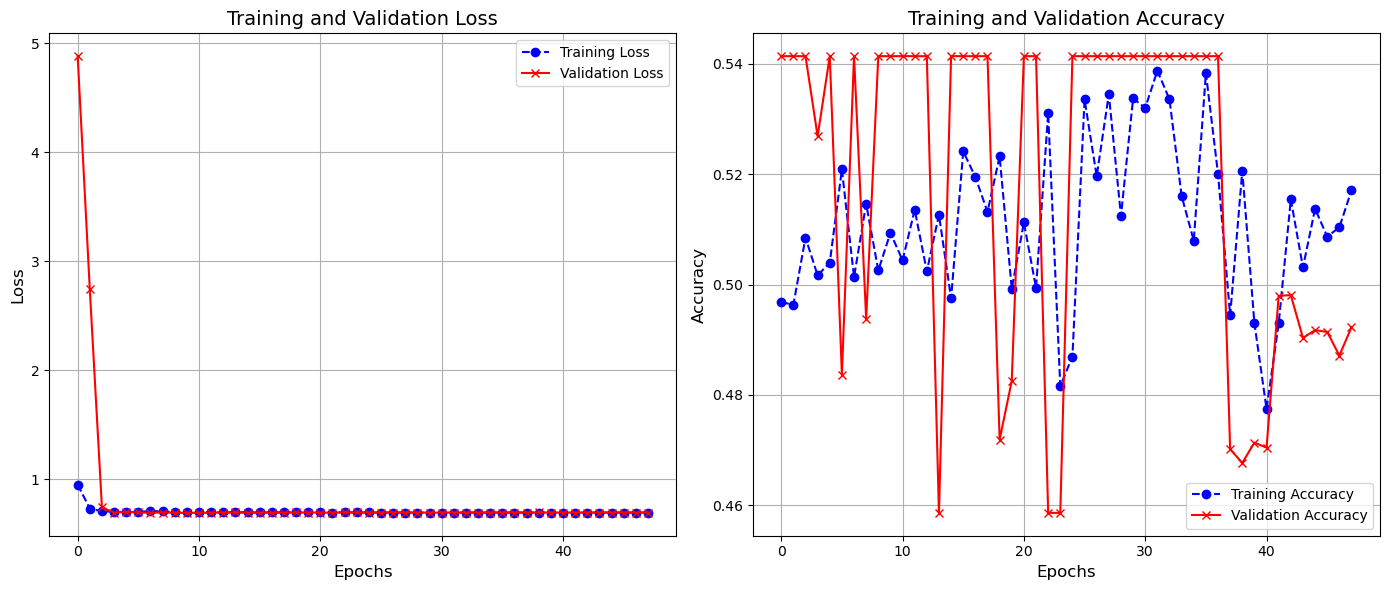

accuracy,▃▃▅▄▄▄▅▄▅▄▄▅▃▆▆▆▃▅▄▇▂▇▆█▅▇█▇▅▄▆▃▆▃▁▅▄▅▅▆
epoch,▁▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
fbeta_score,▇▇█▇▇▇▇▇█▇▇▇▇▆█▆▇▇▇▇▆▅▅▂▇▃▁▅▇▇▇▆▆▆▁█▇▇█▇
learning_rate,█████████████████████▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁
loss,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
mean_iou,▆▆▇▇▇▇▆▇█▆▇▆▆▅█▆▆▆▇▇▅▄▅▂▆▂▁▄▆▆▇▆▆▆▁█▇▇▇▆
val_accuracy,███▇██▄████▁███▂▃██▁███████████▂▂▂▂▄▄▄▄▄
val_fbeta_score,▄▄▄▇▄▄█▄▄▄▄▁▄▄▄▅▇▄▄▁▄▄▄▄▄▄▄▄▄▄▄▄▄▅▄█▇███
val_loss,█▄▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_mean_iou,▄▄▄▇▄▄█▄▄▄▄▁▄▄▄▄▆▄▄▁▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄█▇▇▇█
accuracy,0.51705


Epoch 1/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 143ms/step - accuracy: 0.5023 - fbeta_score: 0.4981 - loss: 1.4741 - mean_iou: 0.3301 - val_accuracy: 0.5414 - val_fbeta_score: 0.3803 - val_loss: 1.0294 - val_mean_iou: 0.2707 - learning_rate: 0.0050
Epoch 2/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 136ms/step - accuracy: 0.5023 - fbeta_score: 0.4979 - loss: 0.7142 - mean_iou: 0.3311 - val_accuracy: 0.5414 - val_fbeta_score: 0.3803 - val_loss: 2.6973 - val_mean_iou: 0.2707 - learning_rate: 0.0050
Epoch 3/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 143ms/step - accuracy: 0.4975 - fbeta_score: 0.4886 - loss: 0.7236 - mean_iou: 0.3259 - val_accuracy: 0.4586 - val_fbeta_score: 0.2884 - val_loss: 0.8608 - val_mean_iou: 0.2293 - learning_rate: 0.0050
Epoch 4/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 138ms/step - accuracy: 0.4996 - fbeta_score: 0.4947 - loss: 0.7070 - mean_iou: 0.3263 - val_accuracy: 0.5414 - val_fbeta_score: 0.3803 - val_loss: 0.8477 - val_mean_iou: 0.2707 - learning_rate: 0.0050
Epoch 5/50
41/41 ━━━━━━━━━━━━━━━

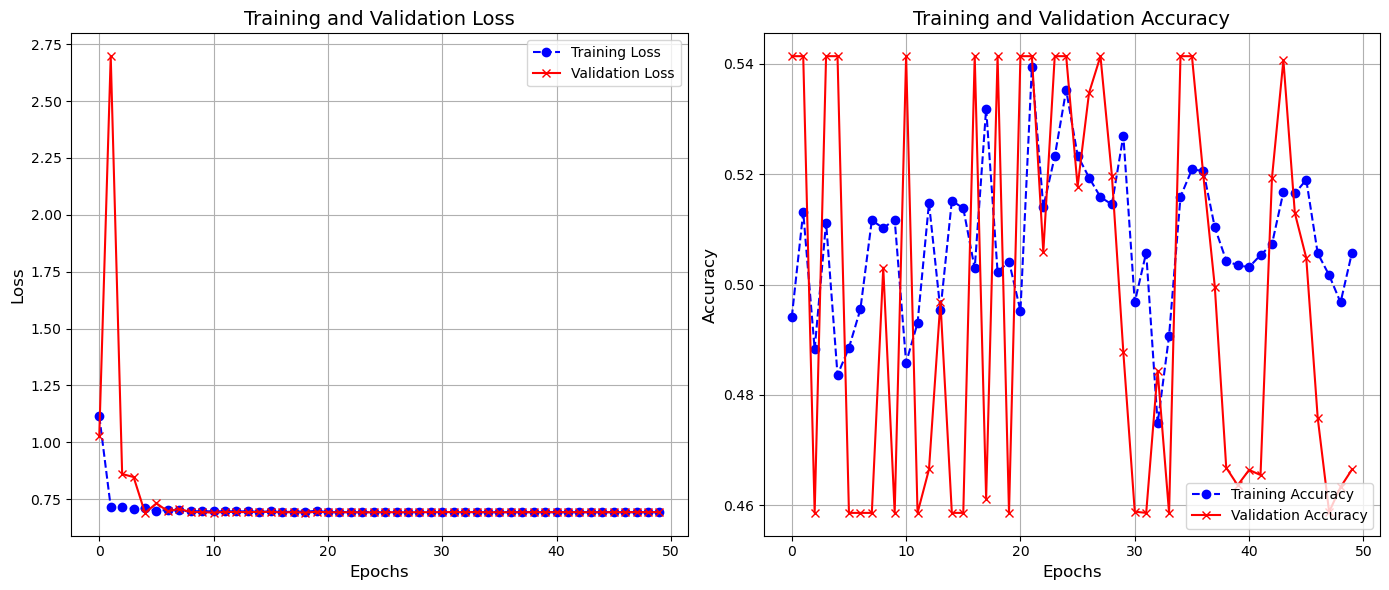

accuracy,▃▅▂▅▂▅▅▅▂▃▃▅▄▇▄▃█▅▆█▆▅▅▇▃▁▃▅▆▆▄▄▄▄▅▆▆▄▄▄
epoch,▁▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇██
fbeta_score,▆█▆▇▅▆█▇█▅▇▇▇█▅▇▇▁█▆▇██▆▇▂▆▆▇▇▇██▇██▇▇▇█
learning_rate,████████████████▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁
loss,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
mean_iou,█▅▆▅▅▇▇█▅▆▆▇██▅▇▆▁▇▆▇█▇█▅█▂▆▆▇▇▇▇▇▇█▇▇▇█
val_accuracy,██▁██▁▁▅▁█▂▁▁█▁▁██▅█▆▇█▆▃▁▃▁██▄▁▂▂▆▆▅▂▁▂
val_fbeta_score,▄▄▁▄▄▁▁█▁▄▄▁▁▄▂▁▄▄█▄▇▅▄▇▇▁▇▁▄▄█▃▂▃▃▄██▅▂
val_loss,▂█▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_mean_iou,▄▄▁▄▄▁▁█▁▄▃█▁▁▄▄▁▄▄█▇▄▇▇▁▇▁▄▄█▃▂▃▃▇██▅▁▃
accuracy,0.5058


Epoch 1/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 139ms/step - accuracy: 0.5087 - fbeta_score: 0.5028 - loss: 0.9525 - mean_iou: 0.3330 - val_accuracy: 0.5414 - val_fbeta_score: 0.3803 - val_loss: 0.7116 - val_mean_iou: 0.2707 - learning_rate: 0.0010
Epoch 2/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 141ms/step - accuracy: 0.4997 - fbeta_score: 0.4987 - loss: 0.7080 - mean_iou: 0.3317 - val_accuracy: 0.4586 - val_fbeta_score: 0.2884 - val_loss: 0.6978 - val_mean_iou: 0.2293 - learning_rate: 0.0010
Epoch 3/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 138ms/step - accuracy: 0.4953 - fbeta_score: 0.4887 - loss: 0.7020 - mean_iou: 0.3265 - val_accuracy: 0.5414 - val_fbeta_score: 0.3803 - val_loss: 0.6903 - val_mean_iou: 0.2707 - learning_rate: 0.0010
Epoch 4/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 135ms/step - accuracy: 0.4960 - fbeta_score: 0.4943 - loss: 0.7028 - mean_iou: 0.3286 - val_accuracy: 0.5414 - val_fbeta_score: 0.3803 - val_loss: 0.7130 - val_mean_iou: 0.2707 - learning_rate: 0.0010
Epoch 5/50
41/41 ━━━━━━━━━━━━━━━

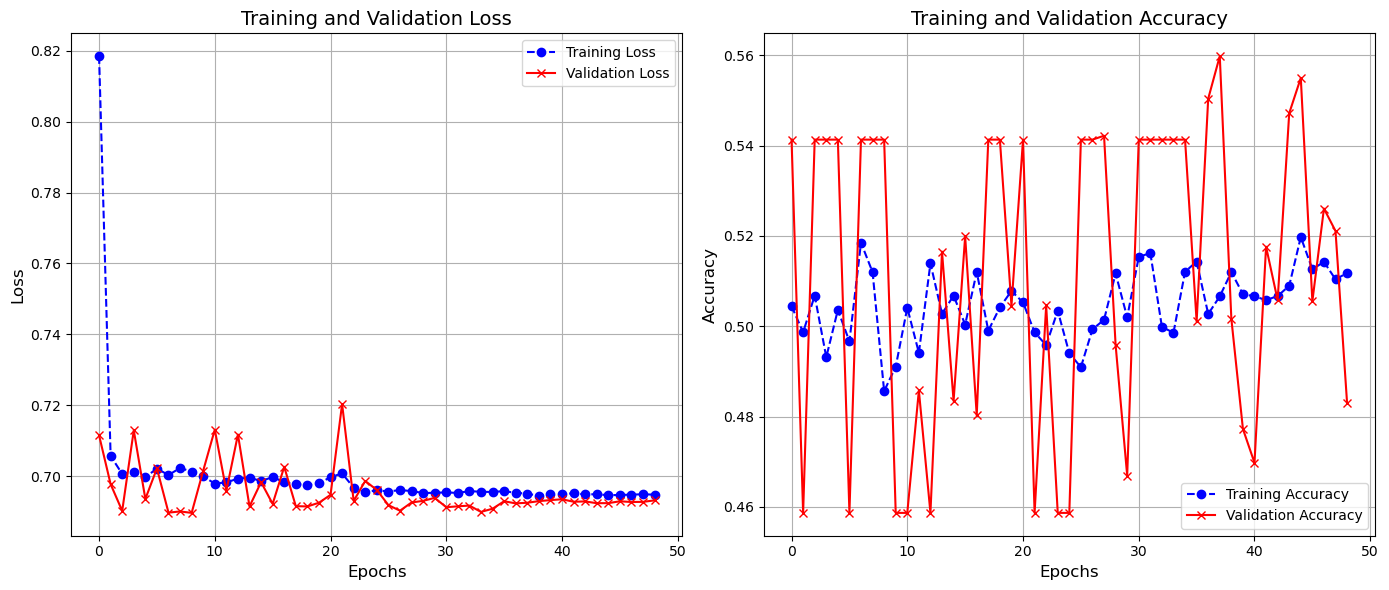

accuracy,▅▄▅▃▅█▆▁▂▅▇▅▅▄▆▅▆▅▄▃▃▂▄▄▆▇▇▄▄▆▅▅▆▅▅▆█▇▇▆
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇▇███
fbeta_score,▆▅▇▃▆▇▇▁▃▆▅▆▆▅▇▆▇▆▅▄▄▂▅▅▇▇▅▄▇▇▇▇▇▆▆▇█▇▇▇
learning_rate,███████████████████▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁
loss,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
mean_iou,▅▅▇▃▅▇▇▁▃▅▄▅▆▅▆▆▆▆▅▄▃▂▅▇▅▆▅▅▆▇▇▇▇▆▆▇█▇▇▇
val_accuracy,▇▁▇▇▇▇▇▇▁▁▁▅▃▅▂▇▄▇▁▄▁▇▇▇▄▇▇▇▇▇▇█▄▂▅▇█▄▆▃
val_fbeta_score,▄▁▄▄▄▄▄▄▁▁▁▇▇▆▄▇▄▁▇▁▄▄▇▇▃▄▄▄▄▇█▇▄▃███▇█▄
val_loss,▆▃▁▆▂▁▁▁▄▆▆▁▃▂▄▁▂▂█▂▂▁▁▂▂▁▁▁▁▂▂▂▂▂▂▂▂▂▂▂
val_mean_iou,▃▁▃▃▃▃▃▃▁▁▁▇▅▇▅▃▇▃▁▇▁▃▃▇▆▃▃▃▃▃█▆▄▃▇▇▇▆█▄
accuracy,0.51179


In [34]:
import wandb

# Training parameters
epochs = 50  # Number of epochs to train the model
batch_size = BATCH_SIZE  # Batch size is already defined
learning_rates = [0.01, 0.005, 0.001]  # Different starting learning rates to try
lr_reduce_patience = [5, 10, 15]

# Save the initial weights
initial_weights = model.get_weights()

# Custom callback to log learning rate
class LogLearningRate(Callback):
    def on_epoch_end(self, epoch, logs=None):
        lr = self.model.optimizer.learning_rate.numpy()
        wandb.log({"learning_rate": lr}, step=epoch+1)

# Loop over different learning rates and patience values
for lrrp in lr_reduce_patience:
    for lr in learning_rates:
        # Initialize a W&B run
        wandb.init(project="segformer_lrrp_experiments", config={
            "epochs": epochs,
            "batch_size": batch_size,
            "lr_reduce_patience": lrrp,
            "learning_rate": lr,
            "class_weights": class_weights,
            "frozen_layers": N
        })
        
        # Reset the model to its initial weights
        model.set_weights(initial_weights)
        
        # Set the learning rate for the model
        model.optimizer.learning_rate = lr
        
        # Optionally set layers to be trainable or not
        for layer in model.layers[:N]:  # N is the number of layers to freeze (set earlier)
            layer.trainable = False
        for layer in model.layers[N:]:
            layer.trainable = True
        
        # Callbacks
        checkpoint_cb = ModelCheckpoint('models/segformer_wandb_lr_{}.keras'.format(lr), 
                                        save_best_only=True, 
                                        monitor='val_loss', 
                                        mode='min')
        early_stopping_cb = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)
        reduce_lr_cb = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=lrrp, min_lr=1e-6)
        wandb_cb = wandb.keras.WandbCallback(save_graph=False, save_model=False)  # W&B callback
        log_lr_cb = LogLearningRate()  # Custom callback to log learning rate

        # Add the custom callback to your list of callbacks
        callbacks = [checkpoint_cb, early_stopping_cb, reduce_lr_cb, wandb_cb, log_lr_cb]

        # Train the model
        history = model.fit(
            train_dataset,
            validation_data=val_dataset,
            epochs=epochs,
            callbacks=callbacks,  # Use the updated callbacks list
            class_weight=class_weights
        )

        # Plot training history with separate subplots for loss and accuracy
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

        # Plot loss
        ax1.plot(history.history['loss'], label='Training Loss', color='blue', linestyle='--', marker='o')
        ax1.plot(history.history['val_loss'], label='Validation Loss', color='red', linestyle='-', marker='x')
        ax1.set_title('Training and Validation Loss', fontsize=14)
        ax1.set_xlabel('Epochs', fontsize=12)
        ax1.set_ylabel('Loss', fontsize=12)
        ax1.legend(loc='upper right')
        ax1.grid(True)

        # Plot accuracy
        ax2.plot(history.history['accuracy'], label='Training Accuracy', color='blue', linestyle='--', marker='o')
        ax2.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red', linestyle='-', marker='x')
        ax2.set_title('Training and Validation Accuracy', fontsize=14)
        ax2.set_xlabel('Epochs', fontsize=12)
        ax2.set_ylabel('Accuracy', fontsize=12)
        ax2.legend(loc='lower right')
        ax2.grid(True)

        # Adjust layout and show plot
        plt.tight_layout()
        plt.show()

        # Finish the W&B run
        wandb.finish()

## Check the network on test images

In [16]:
# optionally load a saved model

# Load the saved model with custom objects
model = load_model('../notebooks/models/segformer_100.keras', custom_objects={'FBetaScoreWrapper': FBetaScoreWrapper})

In [11]:
# Evaluate the model on the test dataset
test_loss, test_accuracy, *other_metrics = model.evaluate(test_dataset)
print(f"Test Accuracy: {test_accuracy:.4f}")

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.8420 - fbeta_score: 0.8417 - loss: 0.3540 - mean_iou: 0.7244
Test Accuracy: 0.8404


## Visualize some predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 610ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


2025-03-26 09:15:41.223858: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


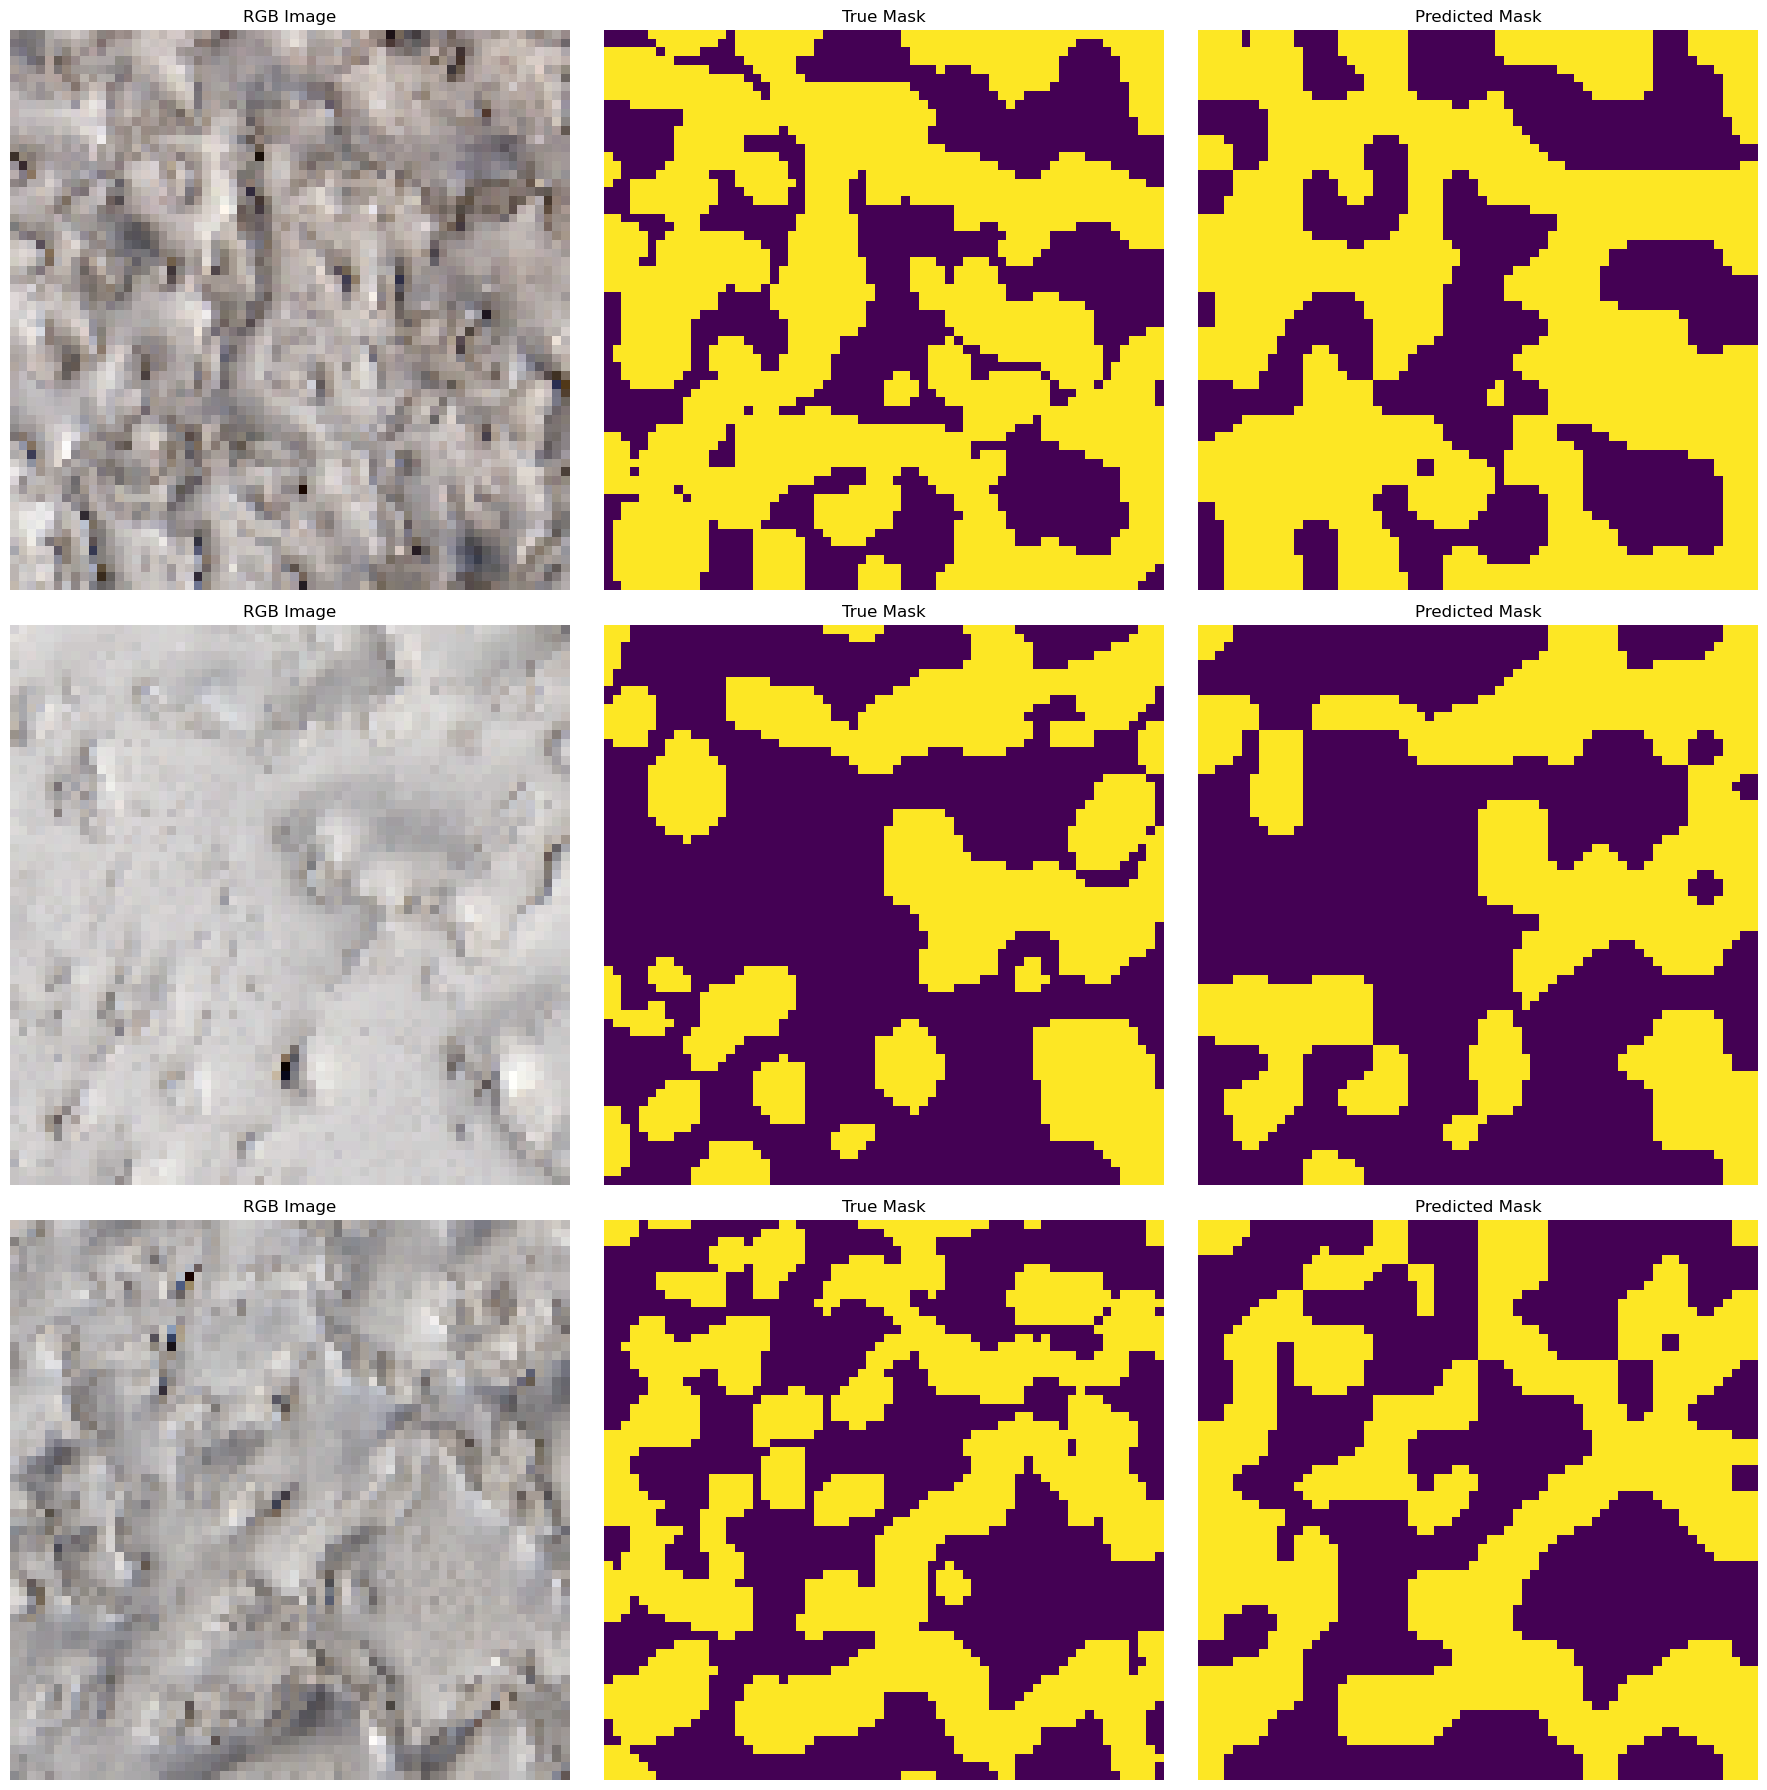

In [12]:
# Define a color scheme for the 12 class labels
colors = [255 * c for i, c in enumerate(color_mapping.values())]

# Adjusted function to overlay mask without transparency
def overlay_mask(image, mask, colors):
    overlay = np.zeros_like(image, dtype=np.uint8)
    
    for i in range(mask.shape[-1]):
        color = np.array(colors[i], dtype=np.uint8)
        mask_channel = mask[:, :, i]
        
        for c in range(3):  # For RGB channels
            overlay[:, :, c] = np.where(
                mask_channel == 1,
                color[c],
                overlay[:, :, c]
            )
    
    return overlay

# Create a figure to display example results
fig, axes = plt.subplots(3, 3, figsize=(18, 18))

# Randomly select 3 images from the test dataset
for i, (image, mask) in enumerate(test_dataset.take(3)):
    image = image.numpy()[0]
    mask = mask.numpy()[0]
    
    # Predict the mask for the image
    pred_mask = model.predict(image[np.newaxis, ...])[0]
    pred_mask = np.argmax(pred_mask, axis=-1)
    pred_mask = tf.one_hot(pred_mask, num_classes).numpy()
    
    # Overlay the true mask and predicted mask on the image
    true_overlay = overlay_mask(image, mask, colors)
    pred_overlay = overlay_mask(image, pred_mask, colors)
    
    # Display the images
    axes[i, 0].imshow(image)
    axes[i, 0].set_title('RGB Image')
    axes[i, 0].axis('off')
    
    axes[i, 1].imshow(true_overlay)
    axes[i, 1].set_title('True Mask')
    axes[i, 1].axis('off')
    
    axes[i, 2].imshow(pred_overlay)
    axes[i, 2].set_title('Predicted Mask')
    axes[i, 2].axis('off')

plt.tight_layout()
plt.show()

## Visualize activations

linear_256


/Users/phillipsm/anaconda3/envs/cnn/lib/python3.12/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor']. Received: the structure of inputs=*
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 581ms/step


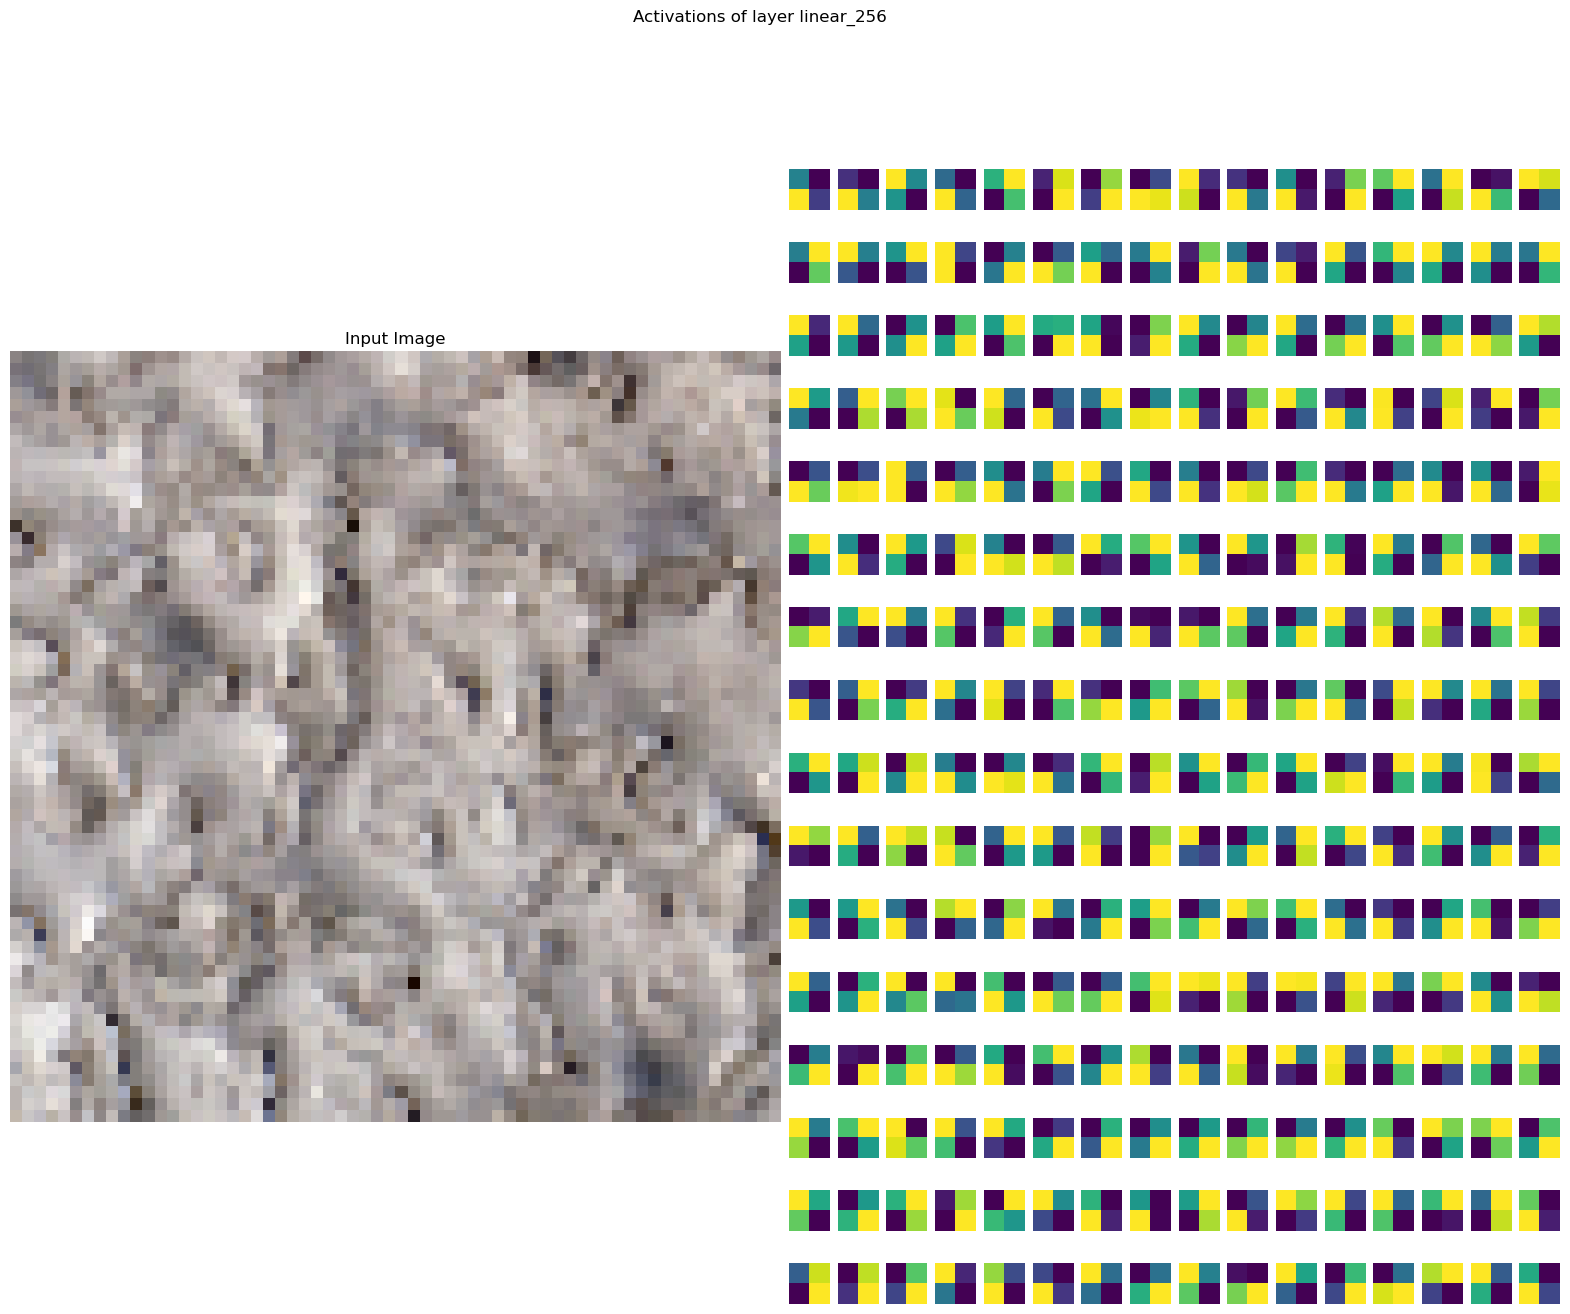

linear_160
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 501ms/step


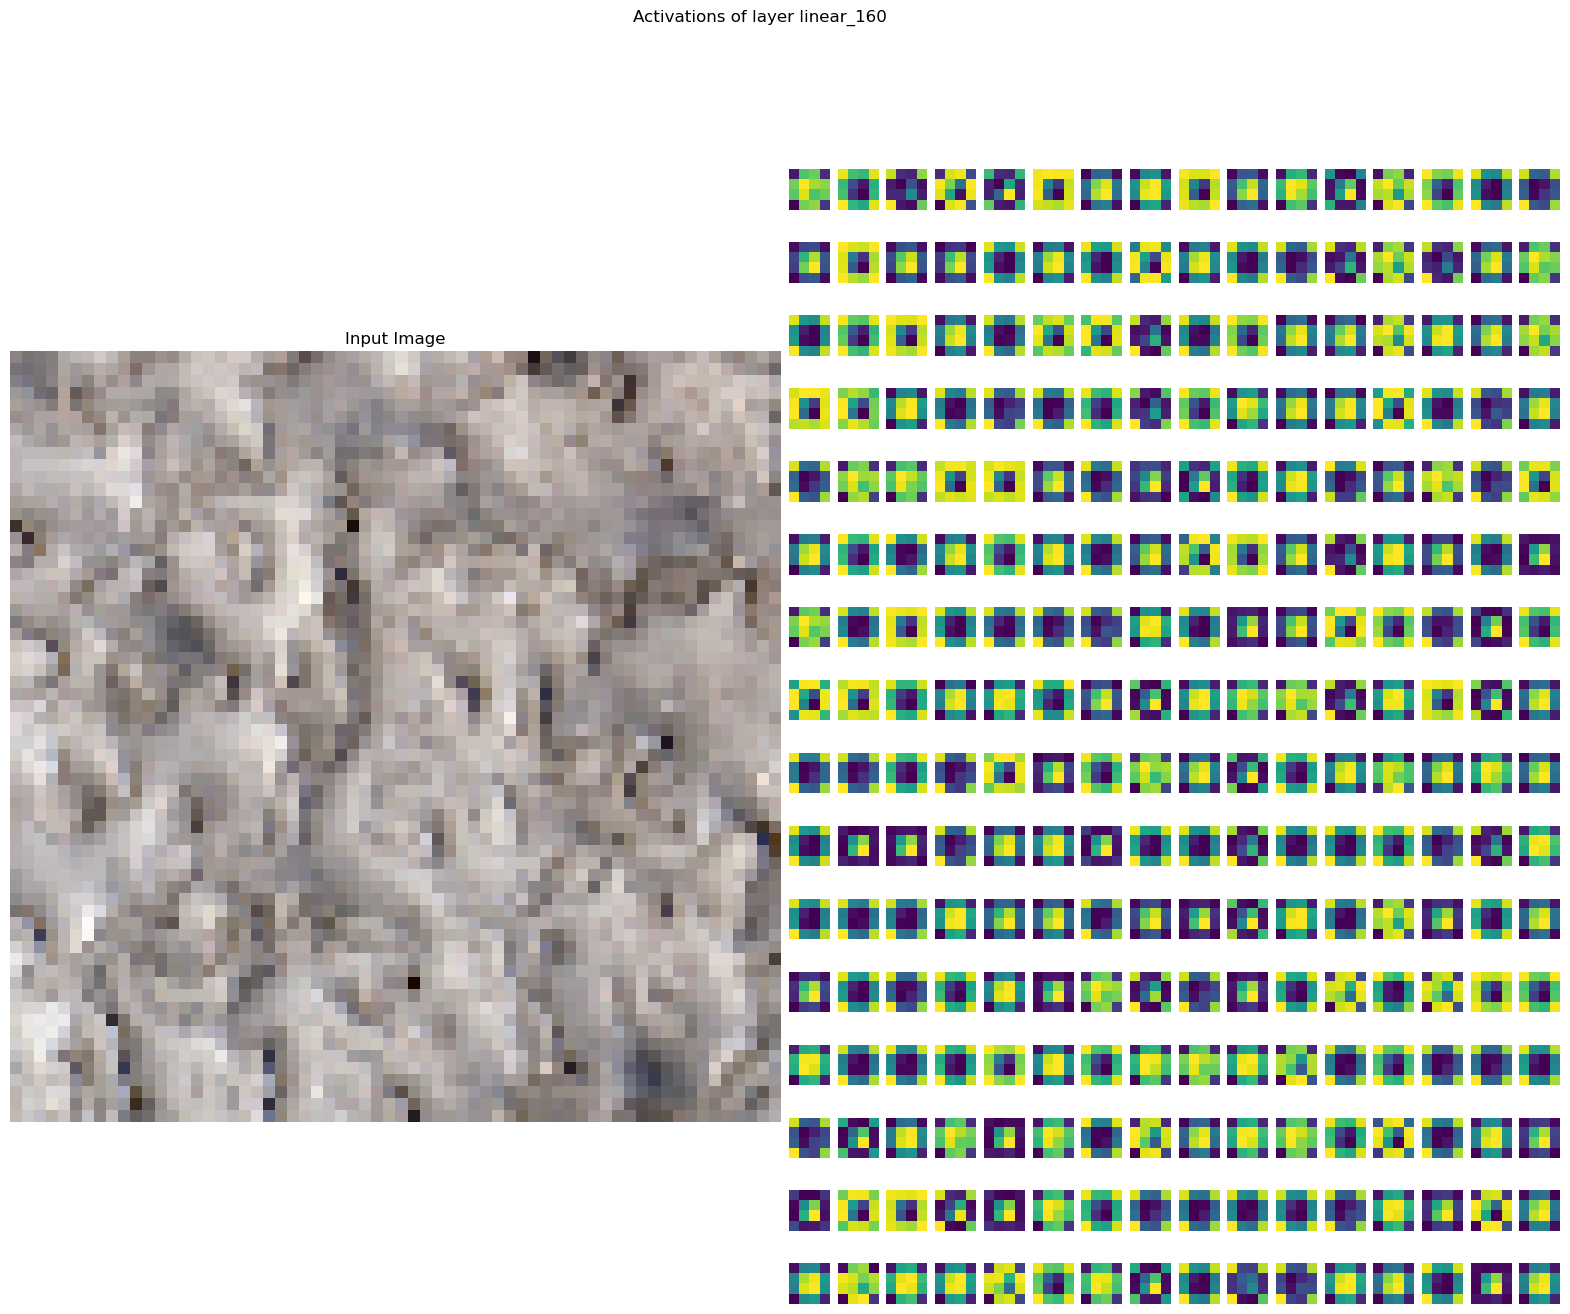

linear_64
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step


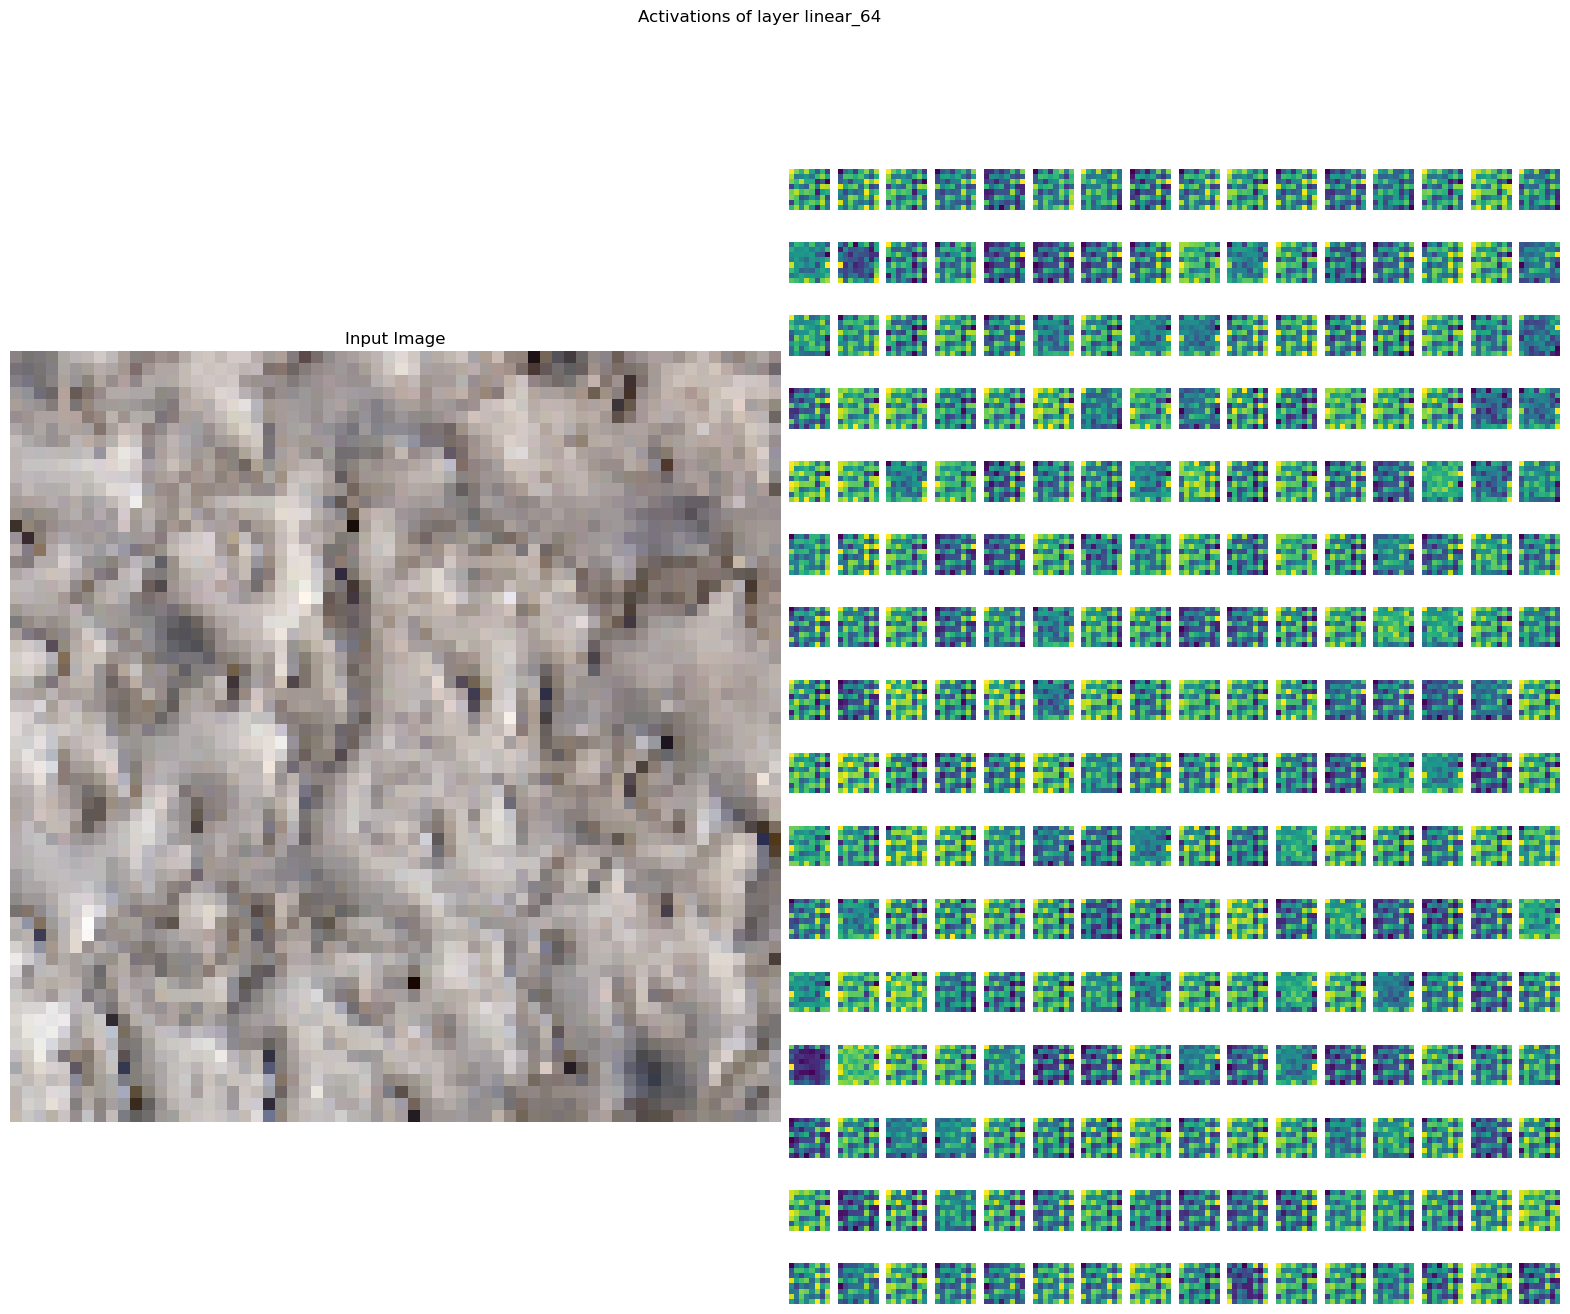

linear_32
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step


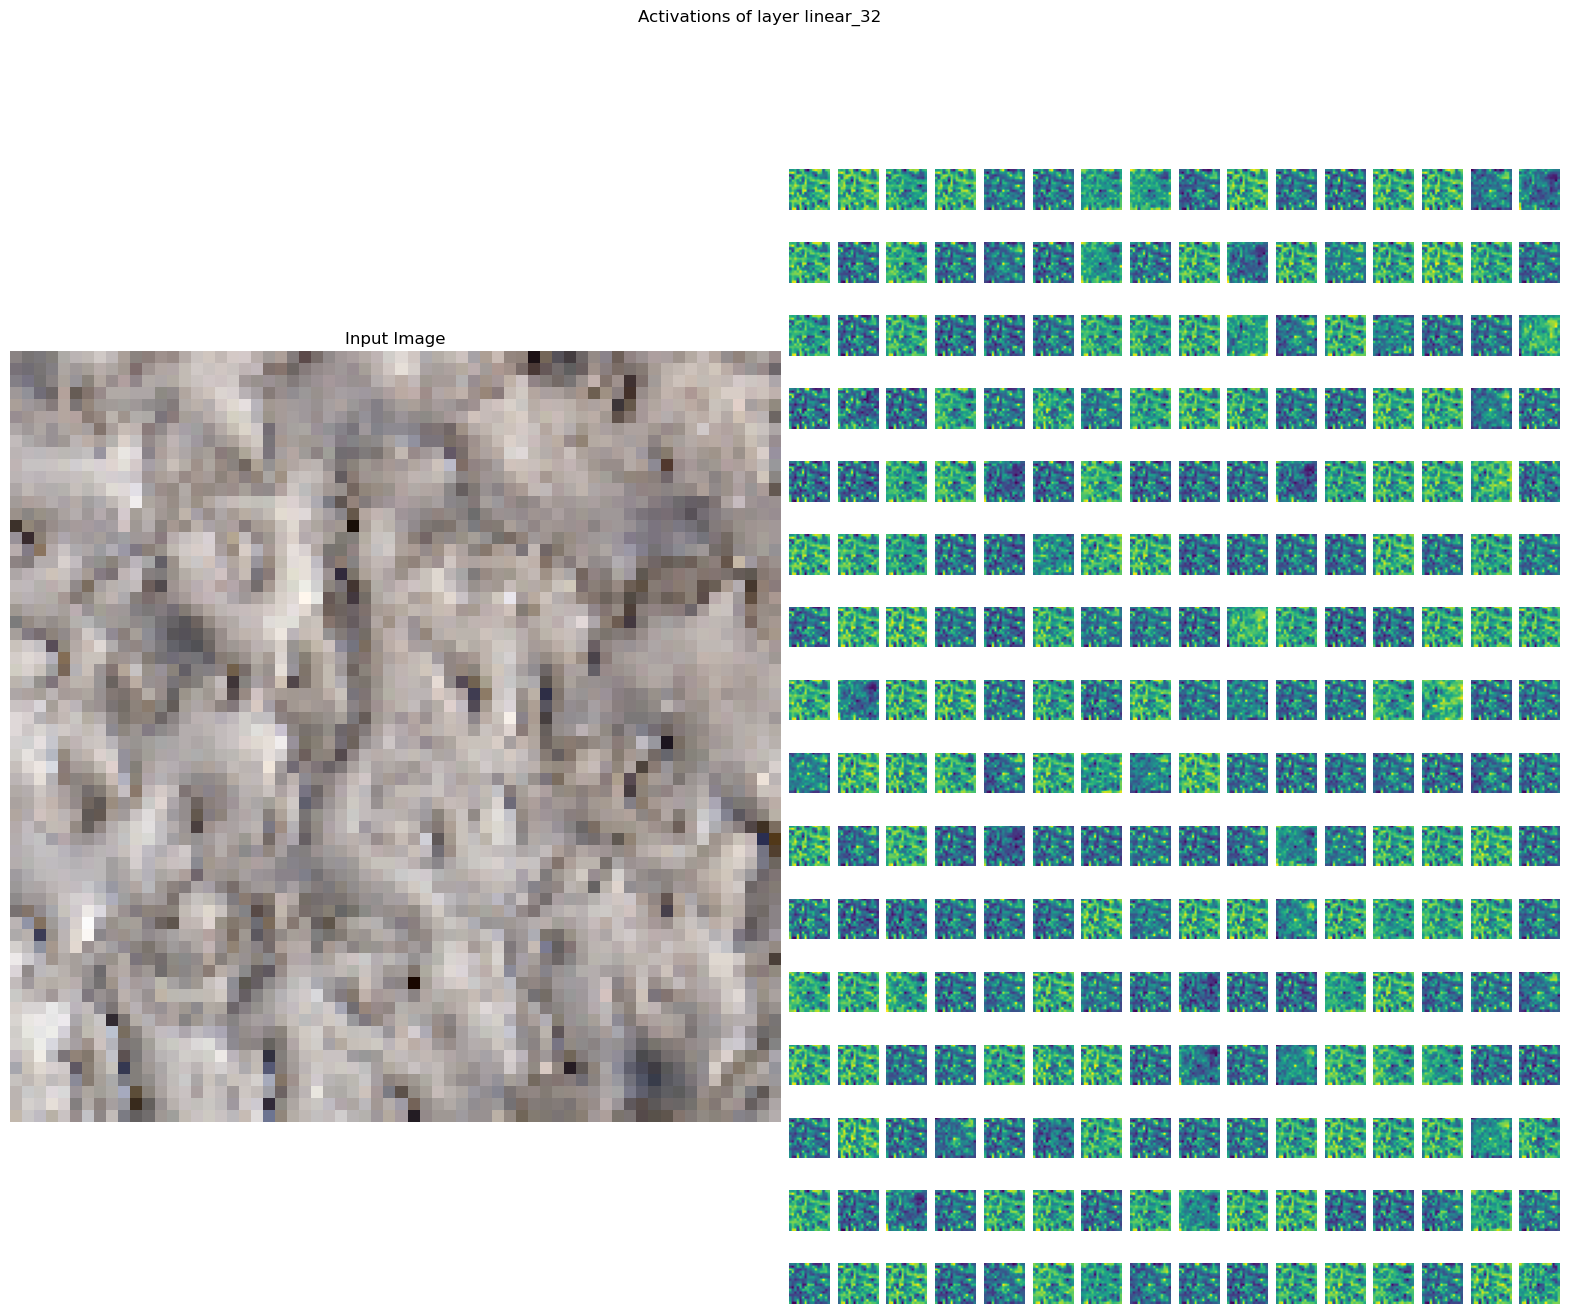

In [16]:
import matplotlib.gridspec as gridspec

def visualize_layer_activations(model, layer_name, input_image):
    # Create a model that outputs the activations of the selected layer
    layer = model.get_layer(name=layer_name)
    activation_model = Model(inputs=model.input, outputs=layer.output)
    
    # Get the activations
    activations = activation_model.predict(np.expand_dims(input_image, axis=0))
    
    # Calculate grid size
    num_activations = activations.shape[-1]
    grid_size = int(np.ceil(np.sqrt(num_activations)))
    
    # Create a figure with gridspec
    fig = plt.figure(figsize=(20, 15))
    gs = gridspec.GridSpec(grid_size, grid_size * 2, width_ratios=[1] * grid_size * 2)
    
    # Left column for input image, spanning the same area as the grid of activations
    ax_input = fig.add_subplot(gs[:, :grid_size])
    ax_input.imshow(input_image)
    ax_input.set_title('Input Image')
    ax_input.axis('off')
    
    # Create a grid for activations in the right column
    for i in range(num_activations):
        ax = fig.add_subplot(gs[i // grid_size, grid_size + (i % grid_size)])
        ax.imshow(activations[0, :, :, i], cmap='viridis')
        ax.axis('off')
    
    plt.suptitle(f'Activations of layer {layer_name}')
    plt.show()

# Example usage
# Take a single batch from the test dataset
batch = test_dataset.take(1)

# Convert the batch to a list to extract the image and label
for images, labels in batch:
    img_ = images[0].numpy()  # Extract the first image and convert to numpy array
    label_ = labels[0].numpy()  # Extract the first label and convert to numpy array
    break  # We only need the first batch

layer_names = [layer.name for layer in model.layers]
look_list = [2, 3, 4, 5]
for l in look_list:
    print(layer_names[l])
    visualize_layer_activations(model, layer_names[l], img_) 

# Other architectures

## DeepLabV3+ Model

## Example: DeepLabV3+ Architecture

DeepLabV3+ is an advanced architecture for semantic segmentation that builds upon the DeepLabV3 model by incorporating an encoder-decoder structure. It is designed to capture both local and global context, providing high-quality segmentation results.

<center>
    <img src="../files/deeplab_architecure2.webp" alt="DeepLabV3+ architecture">
</center>

### DeepLabV3+ Architecture Details

1. **Encoder**: The encoder in DeepLabV3+ is based on a pre-trained backbone network (e.g., ResNet, Xception) that extracts features from the input image. It includes several key components:
    - **Atrous Convolution**: Also known as dilated convolution, atrous convolution allows the network to capture multi-scale context by adjusting the dilation rate.
    - **Atrous Spatial Pyramid Pooling (ASPP)**: ASPP applies multiple parallel atrous convolutions with different dilation rates, capturing features at multiple scales.

2. **Decoder**: The decoder in DeepLabV3+ refines the segmentation map by combining low-level features from the encoder with the high-level features from ASPP.
    - **Low-Level Feature Fusion**: Low-level features from the early layers of the encoder are concatenated with the upsampled high-level features.
    - **Upsampling**: The combined features are upsampled using bilinear interpolation to match the input image resolution.

3. **Output Layer**: A final convolutional layer with a softmax activation produces the segmentation map, ensuring that each pixel is assigned a class label.

### Advantages of DeepLabV3+

- **Multi-Scale Context**: By using atrous convolution and ASPP, DeepLabV3+ captures features at multiple scales, improving segmentation accuracy.
- **Refined Segmentation**: The encoder-decoder structure allows DeepLabV3+ to produce refined segmentation maps with detailed boundaries.
- **Flexibility**: DeepLabV3+ can be used with various backbone networks, making it adaptable to different tasks and datasets.

## Training a DeepLabV3+ Model

### Data Preparation

1. **Dataset**: Collect a dataset with images and corresponding pixel-wise annotations.
2. **Data Augmentation**: Apply transformations such as rotation, scaling, and flipping to increase the diversity of the training data.

### Model Training

1. **Initialize the Model**: Choose the DeepLabV3+ architecture and initialize the model with a pre-trained backbone.
2. **Compile the Model**: Specify the optimizer, loss function, and evaluation metrics.
3. **Train the Model**: Use the training data to fit the model, monitoring the validation performance to prevent overfitting.

### Evaluation

1. **Metrics**: Evaluate the model using metrics such as Intersection over Union (IoU) and pixel accuracy.
2. **Visualization**: Visualize the segmentation results to qualitatively assess the model's performance.

## Conclusion

DeepLabV3+ is a powerful architecture for semantic segmentation, leveraging atrous convolution and an encoder-decoder structure to capture multi-scale context and produce refined segmentation maps. By combining low-level and high-level features, DeepLabV3+ achieves high accuracy on various segmentation benchmarks.

## References

1. [DeepLabV3+: Encoder-Decoder with Atrous Separable Convolution for Semantic Image Segmentation](https://arxiv.org/abs/1802.02611)
2. [Rethinking Atrous Convolution for Semantic Image Segmentation](https://arxiv.org/abs/1706.05587)
3. [Fully Convolutional Networks for Semantic Segmentation](https://arxiv.org/abs/1411.4038)

In [ ]:
# Parameters
input_shape = (target_size[0], target_size[1], 3)  # Adjust based on image size

# weight options: [https://keras.io/api/keras_cv/models/tasks/deeplab_v3_segmentation/]
    # deeplab_v3_plus_resnet50_pascalvoc
    # mobilenet_v3_large_imagenet, mobilenet_v3_small_imagenet
    # efficientnetv2_s_imagenet
    # vitdet_base_sa1b, vitdet_large_sa1b, vitdet_huge_sa1b
base_model = keras_cv.models.DeepLabV3Plus.from_preset('resnet50_v2_imagenet', input_shape=input_shape, num_classes=num_classes)

### adjustments to the model

In [ ]:
adjust_final_layer = False

# Register the custom class with Keras
@register_keras_serializable()
class FBetaScoreWrapper(tf.keras.metrics.Metric):
    def __init__(self, num_classes, average='weighted', name='fbeta_score', **kwargs):
        super(FBetaScoreWrapper, self).__init__(name=name, **kwargs)
        self.num_classes = num_classes
        self.average = average
        self.fbeta_score = FBetaScore(average=average)

    def update_state(self, y_true, y_pred, sample_weight=None):
        # Flatten the predictions and targets
        y_true = tf.reshape(y_true, [-1, self.num_classes])
        y_pred = tf.reshape(y_pred, [-1, self.num_classes])
        self.fbeta_score.update_state(y_true, y_pred, sample_weight)

    def result(self):
        return self.fbeta_score.result()

    def reset_states(self):
        self.fbeta_score.reset_states()

    def get_config(self):
        config = super(FBetaScoreWrapper, self).get_config()
        config.update({
            'num_classes': self.num_classes,
            'average': self.average
        })
        return config

    @classmethod
    def from_config(cls, config):
        return cls(**config)

# Instantiate the custom metric
fbeta_score_metric = FBetaScoreWrapper(num_classes, average='weighted')

# Freeze the top layers of the base model
N = 4
for layer in base_model.layers[:N]: 
    layer.trainable = False

if adjust_final_layer:
    # Adjust the output layer to match the number of classes
    inputs = base_model.input  # Get the input of the original model
    x = base_model.output  # Get the output of the original model

    # Add a custom output layer for segmentation (change filters to match `num_classes`)
    x = layers.Conv2D(num_classes, (1, 1), activation='softmax')(x)

    # Create a new model with the modified output
    model = models.Model(inputs, x)
else:
    model = base_model

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss=CategoricalCrossentropy(from_logits=False),
    metrics=['accuracy', 
             MeanIoU(num_classes=num_classes, sparse_y_true=False, sparse_y_pred=False, name='mean_iou'),
             tf.keras.metrics.CategoricalAccuracy(),
             fbeta_score_metric]
)

# Display the model architecture
model.summary()

# Visualize the model architecture
plot_model(model, to_file='deeplab_architecture.png', show_shapes=True, show_layer_names=True)